In [588]:
import os
import numpy as np
import lxml
from lxml import objectify, etree, html
import json
import urllib3
from io import StringIO, BytesIO
import pandas as pd

import matplotlib.pyplot as plt
import re
import string
import pymorphy2
from scipy.sparse import *
#import enchant
import stop_words
from nltk.stem.snowball import RussianStemmer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer

%matplotlib inline

# Лабораторная №1. Сбор корпуса.

In [589]:
MURL = 'https://ria.ru'
pol_URL = 'https://ria.ru/world/'
corpus=[]
corpus_cat=[]
texts=[]

In [590]:
http = urllib3.PoolManager()
r = http.request('GET', pol_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
#print(title)
title[0].getchildren()

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[<Element a at 0xba7c148>,
 <Element div at 0xd7fdd78>,
 <Element div at 0x3d87300>]

In [591]:
some_title = page.xpath("//div[@class='list-item__title']")[0].text
print(some_title)
some_title = page.xpath("//div[@class='list-item__title']")[1].text
print(some_title)

ФСБ сообщила о попытке террористов создать центр "халифата" в Афганистане 
МИД: участники иранской сделки не допустят срыва соглашения со стороны США 


In [592]:
a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")

for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    
    URL2 = a[i]

    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
   
    pol_text = ' '
    for j in range(len(title2)):
        pol_text+=str(title2[j].text)
        pol_text+=' '
    corpus.append(pol_text)
    corpus_cat.append(0)
    texts.append(pol_text)
    print (URL2)
    print (i, ': ',pol_text)

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833659.html
0 :   None "Террористические группировки значительно активизировали диверсионно-террористическую деятельность и укрепили свои позиции в северных районах Афганистана. Участились вооружённые инциденты на границе", - сказал Смирнов. "С учётом понесённых потерь в Сирии и Ираке, ИГИЛ* вынуждена искать пути по созданию новых опорных центров "халифата". Усиление ИГИЛ* на севере Афганистана может представлять в ближайшей перспективе основную угрозу региональной безопасности", - отметил он. None 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833500.html
1 :   None "Члены совместной комиссии полны решимости противодействовать санкционным нападкам со стороны США и не допустить срыва выполнения согласованных ранее проектов, которые являются неотъемлемой частью договоренностей 2015 года, задействовать все имеющиеся для этого возможности", - сказала Захарова на брифинге. Она также выразила надежду, что созданный как шаг в направлении противодействия санкциям США механизм INSTEX скоро заработает и будет использован для поддержки ядерного соглашения. Иран и "шестерка" международных посредников (Россия, США, Британия, Китай, Франция, Германия) 14 июля 2015 года достигли исторического соглашения об урегулировании многолетней проблемы иранского атома: был принят Совместный всеобъемлющий план действий (СВПД), выполнение которого снимало с Ирана введенные ранее экономические и финансовые санкции со стороны СБ ООН, США и Евросоюза. США в мае 2018 года объявили о выходе из соглашения о ядерной программе с Ира

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833415.html
2 :   None Медицинская помощь морякам также оказывается, добавила Захарова. Судно Eser под флагом Панамы, следовавшее из этой страны в Танжер (Марокко), было задержано, когда сделало вынужденную остановку в порту Прая на Кабо-Верде после смерти одного из членов экипажа, сообщало посольство РФ в Кабо-Верде 1 февраля. Согласно заявлению уголовной полиции Кабо-Верде, после проверки судна было конфисковано 260 тюков общим весом 9,57 тонны. Было установлено, что в тюках содержится кокаин. Над 11 задержанными моряками из РФ состоялся суд, им была избрана мера пресечения в виде содержания под стражей, обвинения не предъявлены, идет расследование. Позднее стало известно, что задержано 12 членов экипажа. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833357.html
3 :   None "Иран неукоснительно соблюдает все соответствующие требования, это регулярно подтверждает МАГАТЭ. Ядерная деятельность в этой стране находится под постоянным контролем со стороны Агентства и является образцом прозрачности", - сказала Захарова на брифинге в пятницу. По ее словам, это касается и перепрофилирования предприятия для обогащения урана в Фордо на производство стабильных изотопов, чем вплотную занимаются российские атомщики, а также модернизация реактора в Араке. Официальный представитель МИД РФ добавила, что предметом всеобщей озабоченности являются и действия США, направленные на то, чтобы воспрепятствовать последовательной реализации ядерной сделки после того, как Вашингтон принял решение покинуть эту договоренность, в результате чего оказался "на дипломатической обочине". Иран и "шестерка" международных посредников (Россия, США, Британия, Китай, Франция, Германия) 14 июля 2015 года достигли исторического соглашения об урегу

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833257.html
4 :   МИД РФ О ЗАЯВЛЕНИИ США О СРОКАХ ПРЕДЪЯВЛЕНИЯ ДОКАЗАТЕЛЬСТВ ОБВИНЕНИЙ УИЛАНУ: НЕ ВИДИМ ПОВОДОВ ДЛЯ ВОЗМУЩЕНИЯ, ПРАВООХРАНИТЕЛЬНЫЕ ОРГАНЫ РАБОТАЮТ РИА НОВОСТИ 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833034.html
5 :   None "Настоящая причина кровопролития на улицах Новой Зеландии сегодня - иммиграционная программа, которая изначально позволяет мусульманам-фанатикам переселяться в Новую Зеландию", - цитирует портал заявление сенатора, которое он сделал после стрельбы в Новой Зеландии. Как отмечает портал, через некоторое время "доказательства того, что он поделился этим заявлением" были удалены из его социальных сетей. По данным портала, политик отметил, что хотя мусульмане стали жертвами атаки, они также виновны в ней, и "религия ислам в целом". При этом Эннинг подчеркнул, что он "решительно выступает против насилия в любой форме" и "абсолютно осуждает действия стрелка". Заявление австралийского сенатора быстро разошлось по интернету, после чего многие политики обрушились на него с критикой. Премьер страны Скотт Моррисон назвал отвратительными комментарии Эннинга, "обвинившего иммиграцию в нападениях свирепых правых террористов-экстремистов". "Таким взгл

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551832970.html
6 :   None По данным пресс-службы, отказ предоставлен на основании выводов экспертного совета Госкомтелерадио. В ведомстве отметили, что запрещен ввоз книг московских издательств "Альпина Паблишер", "Альпина нон-фикшн", "Эксмо" и самарского издательства "ИД Бахрах-М", в частности, не будет распространяться на Украине книга Даниила Демина "Корпоративная культура. Десять самых распространенных заблуждений". Под запрет также подпала детская книга Елены Смешливой и Ланы Богомаз "Чему я могу научиться у Анны Ахматовой". Также запретили ввоз книг Артура Салякаева "Неслучайные связи: нетворкинг как образ жизни", Владислава Моисеева "Бизнес из ничего, или Как построить интернет-компанию и НЕ сойти с ума" и Михаила Умарова "PR в реальном времени: Тренды. Кейсы. Правила", в которых "популяризируются российские социальные сети "ВКонтакте", "Одноклассники" и сервисные порталы "Яндекс". Кроме того, отказано в разрешении на ввоз ряда книг зарубежных авторов, в

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551832647.html
7 :   None "Кризисная ситуация на севере Косово является следствием многолетнего потакания Приштине со стороны внешних кураторов – США и ЕС. Этим объясняются нынешние непомерные аппетиты косовских албанцев, их непримиримая линия в диалоге с Белградом. Вашингтон и Брюссель обязаны обуздать выращенных под покровительством Запада приштинских радикалов", - заявила Захарова на брифинге в пятницу. По ее оценкам, "на сербонаселенном севере Косово отмечается рост напряженности". "Косово-албанские власти ужесточают контроль на административной линии, мотивируя это необходимостью перекрытия нелегальных, в их понимании, поставок товаров из Сербии в обход введенных Приштиной в ноябре 2018 года заградительных 100-процентных пошлин. Ухудшается ситуация с доступностью некоторых ресурсов жизнеобеспечения, прежде всего, отдельных продуктов питания", - отметила официальный представитель МИД России. "Где все правозащитные структуры европейские? Где люди, которые за

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551832411.html
8 :   None "В текущем году из биологического материала, доставленного из Ахтырского района, выявлен позитивный результат в высоких титрах, который свидетельствует о необходимости повышенной осторожности как медицинских работников, так и населения области", – говорится в сообщении. При этом врачи признали, что вакцины от этой инфекции на территории Украины сейчас нет, а профилактика болезни сводится к уничтожению главных ее распространителей – грызунов. Туляремия – острая инфекционная болезнь животных и человека, которая поражает лимфатическую систему, кожу и селезенку. Возбудитель болезни – туляремийная палочка, а основным источником для человека являются грызуны: ондатры, крысы, мыши, суслики, зайцы. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551832382.html
9 :   None Официальный представитель МИД РФ напомнила, что движение "Талибан" продолжает нападения на военные базы. Авиация коалиции и проправительственные войска, в свою очередь, не снижают интенсивность бомбардировок. По ее словам, появилась даже информация о достижении предварительного соглашения об условиях вывода иностранных контингентов из Афганистана. Во вторник спецпредставитель США по Афганистану Залмай Халилзад заявил о выработке черновика соглашения с талибами по итогам очередного раунда переговоров в Дохе, в частности, по выводу американских войск из страны. При этом он отметил, что окончательных договорённостей ещё нет. В свою очередь источник в афганской делегации сообщил РИА Новости, что представители движения "Талибан" возобновят переговоры с США в Катаре через две недели - в конце марта. США и их союзники с 2001 года проводят операцию в Афганистане против талибов и других группировок. Эта военная кампания стала самой продолжитель

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551832211.html
10 :   None Очередные президентские выборы пройдут на территории Украины 31 марта. На пост главы государства претендуют 39 кандидатов. Согласно социологическим исследованиям, лидировала в гонке Тимошенко, однако последних два месяца лидерство в рейтинге удерживает Зеленский. Опубликованный 13 марта на сайте центра "Социс" опрос свидетельствует, что Зеленского готовы поддержать 27,7% избирателей, которые точно пойдут голосовать и определились с выбором кандидата. Порошенко набрал 19,6%, Тимошенко - 14,8%. При этом она отметила, что такой риск ни одна из команд конкурентов действующего главы государства сейчас не оценивает в полной мере, все заняты своими делами. Эксперт выразила мнение, что победу на президентских выборах можно прогнозировать Зеленскому или Тимошенко, если команда Порошенко не станет нарушать избирательное законодательство в день голосования. "Математическую победу можно прогнозировать Зеленскому, если он не пропустит две технолог

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551828235.html
11 :   None В пятницу, 15 марта в двух мечетях Крайстчерча (Новая Зеландия) открыли стрельбу по прихожанам. Помимо этого, в припаркованных рядом с мечетями автомобилях полиция нашла несколько самодельных взрывных устройств, они уже обезврежены. В результате погибли 49 человек.  Задержаны трое подозреваемых, остальные объявлены в розыск. Один из нападавших, уроженец австралийского Графтона Брентон Таррант вел онлайн-трансляцию происходящего, а перед атакой опубликовал 37-страничный манифест. Мужчина известен ультраправыми взглядами.  Власти Новой Зеландии назвали нападение террористическим актом.  В июле 2017 года во Франции был предотвращен теракт, готовившийся против президента страны. Экстремист был недоволен словами Макрона о том, что французской культуры не существует, а есть разнообразная, в том числе исламская культура.  После расправы над Макроном несостоявшийся террорист собирался обратить оружие против мусульман, однако попал в поле зрен

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551831893.html
12 :   None Порошенко в пятницу поедет в Закарпатскою область, там запланировано заседание совета регионального развития. По данным сайта, к приезду Порошенко в области несколько дней активно готовились, в частности латали ямы на дорогах, убирали обочины вдоль трассы Киев-Чоп и мыли мост в Ужгороде. "В Виноградове также решили присоединиться к "марафону" и украсить город к приезду гаранта (конституции - ред.). Местные жители поставили яркие цветы в ямы на дорогах. В общем, в ямы поставили 100 цветков", - говорится в сообщении. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551830939.html
13 :   None Ранее о намерениях отозвать из Каракаса всех остающихся там американских дипломатов заявил госсекретарь США Майк Помпео. Он отметил, что их присутствие является сдерживающим фактором для американской политики, но не уточнил, в чем это проявляется. "Тревожно другое: госсекретарь США заявил, что присутствие персонала стало ограничением для действий США. Это какие такие действия имелись в виду?" - добавила она. В Венесуэле 21 января начались массовые протесты против Мадуро, вскоре после приведения его к присяге. После начала беспорядков лидер оппозиции Хуан Гуаидо незаконно провозгласил себя временным главой государства. Ряд стран Запада во главе с США заявили о признании Гуаидо. В свою очередь Мадуро назвал главу парламента марионеткой США. Россия, Китай и ряд других стран поддержали Мадуро как легитимного президента. В Москве назвали "президентский статус" Гуаидо несуществующим. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551830912.html
14 :   None В пятницу в двух мечетях Крайстчерча произошла стрельба. Полиция сообщила о 49 погибших. Были задержаны четверо подозреваемых в причастности к нападению, среди них гражданин Австралии. "От имени Совета Федерации и от себя лично выражаю искренние соболезнования в связи с трагическими последствиями террористического акта, совершенного в городе Крайстчерче", - говорится в направленной Матвиенко телеграмме председателю Палаты представителей Новой Зеландии Тревору Малларду. Спикер Совфеда попросила передать слова сочувствия и поддержки родным и близким погибших, а также пожелания скорейшего выздоровления всем пострадавшим. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551829056.html
15 :   None Мать и отец детей арестованы. Ни один из них не признался в совершенном преступлении. В субботу они будут давать показания судье. В последний раз пятимесячную девочку Рэчел и мальчика Амиэля, которому три с половиной года, видели живыми в среду. Соседи вызвали Гражданскую Гвардию после того как услышали крики, а затем увидели, как почти обнаженная женщина бежит по улице. Отец в момент приезда полиции находился в доме и заявил, что вся его семья мертва. Однако сотрудники правоохранительных органов нашли женщину, спрятавшуюся в бочке. В поисках детей участвовали более 100 гвардейцев и пожарных. Опрос родителей не давал результатов. По словам представителя правительства в сообществе Валенсия Хуана Карлоса Фульхенсио, они "не шли на сотрудничество со следствием". Родители выдвигали разные версии произошедшего. Отец, видимо, находившийся под действием психотропных веществ, утверждал, что дети находятся в бассейне. "Жена попросила поместить

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551828528.html
16 :   None Решение  В список вошли: Решение Евросоза уже приветствовал президент Украины Петр Порошенко. Причем он пообещал, что это "лишь начало". "Если Россия продолжит нападать на украинские корабли, препятствовать свободе судоходства и блокировать украинское Приазовье, санкции будут расширены и усилены", —  Кроме того, Евросоюз в очередной раз продлил на полгода индивидуальные санкции, введенные в 2014 году за "нарушение территориальной целостности Украины". Сейчас эти ограничительные меры распространяются на 170 человек и 44 юридических лица. Они будут действовать до 15 сентября. Ввести санкции из-за инцидента в Азовском море планируют и США. Ограничения могут затронуть не менее 24 офицеров и весь российский судостроительный сектор. Об этом говорится в тексте законопроекта "О защите американской безопасности от агрессии Кремля" (DASKA), который внесли в конгресс в феврале. Решение ЕС прокомментировал депутат крымского парламента Иван Шонус.

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551828642.html
17 :   None В Венесуэле 21 января начались массовые протесты против действующего президента Николаса Мадуро, вскоре после приведения его к присяге. После начала беспорядков спикер оппозиционного парламента Хуан Гуаидо незаконно провозгласил себя временным главой государства. Ряд стран Запада во главе с США заявили о признании Гуаидо. В свою очередь Мадуро назвал главу парламента марионеткой США. Россия, Китай и ряд других стран поддержали Мадуро как легитимного президента Венесуэлы. В Москве назвали "президентский статус" Гуаидо несуществующим. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551828073.html
18 :   None "За прошедшие сутки в Сирийскую Арабскую Республику с территорий иностранных государств возвратились 1016 беженцев, в том числе из Ливана через пункты пропуска "Джейдет-Ябус", "Телль-Калах" – 156 человек (женщин – 47, детей – 80), из Иордании через пункт пропуска "Насиб" – 860 человек (женщин – 258, детей – 439)", - говорится в бюллетене. Сообщается, что в места постоянного проживания внутри страны в течение суток вернулись 52 сирийца. За прошедшие сутки фондом имени Ахмата Кадырова проведена адресная благотворительная помощь в Алеппо, в ходе которой семьям военного "Мухабарата" выдано 15 продовольственных наборов. По данным центра, инженерные подразделения САР за сутки разминировали 1,7 гектара территорий в двух провинциях. "Обнаружено и уничтожено 27 взрывоопасных предметов", - говорится в бюллетене. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551827705.html
19 :   None Ранее сообщалось о задержании четырех подозреваемых в причастности к нападению, среди них гражданин Австралии. Ему были предъявлены обвинения в убийстве. В пятницу минимум в двух мечетях Крайстчерча произошла стрельба. Полиция сообщила о 49 погибших. Премьер-министр Новой Зеландии Джасинда Ардерн назвала произошедшее терактом. 


In [593]:
eco_URL = 'https://ria.ru/economy'
http = urllib3.PoolManager()
r = http.request('GET', eco_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
title[0].getchildren()

a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")

for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    URL2 =  a[i]
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
 
    eco_text = ' '
    for j in range(len(title2)):
        eco_text+=str(title2[j].text)
        eco_text+=' '
    corpus.append(eco_text)
    corpus_cat.append(1)
    texts.append(eco_text)
    print (URL2)
    print (i, ': ',eco_text)

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551831862.html
0 :   None "Нет, такого понимания нет (откуда эти нерезиденты. - Прим. ред.). То, что там в прессе муссируется тема по поводу венесуэльского следа, это просто домыслы", - сказал Силуанов журналистам. Ранее на текущей неделе РБК со ссылкой на банковских аналитиков написало, что значительный спрос на российские облигации федерального займа (ОФЗ) в конце февраля 2019 года мог быть дополнительно обеспечен покупками со стороны инвесторов из Венесуэлы, которые таким образом якобы формируют инвестиционные портфели для сохранения своих сбережений. Минфин РФ на аукционах 27 февраля продал ОФЗ двух выпусков на 57,6 миллиарда рублей, что стало рекордным с 2014 года размещением. Успеху аукциона способствовал ряд факторов, таких как благоприятная рыночная конъюнктура и гибкость нового механизма размещения без предварительного объявления лимитов, которые и помогли в должном объеме удовлетворить спрос инвесторов, отмечало российское министерство финансов. На те

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551830894.html
1 :   None Стоимость бивалютной корзины (0,55 доллара и 0,45 евро), рассчитанная по официальным курсам на выходные и понедельник, увеличилась по сравнению с показателем на пятницу на 1,3 копейки, составив 69,311925 рубля. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551828583.html
2 :   None В целом в деловой программе "Арабия-ЭКСПО 2019" примут участие около 10 тысяч человек, из которых более тысячи представят 700 компаний и объединений Ближнего Востока. "Всего мы ожидаем в Москве гостей из 18 арабских государств, в том числе Саудовской Аравии, Алжира, Ирака, Ливии, Бахрейна, Катара, Египта, ОАЭ и других. С российской стороны заинтересованность в мероприятиях "Арабия-ЭКСПО" выразили более 80 регионов, а также целый ряд крупных российских компаний, которые смогут презентовать на площадке выставки производственный, инвестиционный и экспортный потенциалы", - рассказала директор РАДС Татьяна Гвилава. Одновременно с проведением форума и XII сессии РАДС ожидаются заседания российско-бахрейнской и российско-катарской межправительственных комиссий по торгово-экономическому и научно-техническому сотрудничеству, а также ряда межгосударственных деловых советов, добавили в РАДС. РАДС осуществляет деятельность по развитию российско-ар

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551828364.html
3 :   None Росавиация после  "Приостановили (полеты этих самолетов в воздушном пространстве РФ - Прим. ред). Я уверен, что наши авиакомпании по этому вопросу с производителем проведут необходимые консультации. Пока, по моей информации, никаких отказов от наших авиакомпаний не поступало", - сказал Дитрих в кулуарах финала конкурса управленцев "Лидеры России". На сегодняшний день заказчиками таких самолетов в РФ являются, в частности, авиакомпании "Ютэйр", "Победа", "Уральские авиалинии". "Та ситуация, которая сложилась, для рынка не позитивна с учётом того, что Boeing 737 Max, как и Airbus 320 и 321, это основные рабочие лошадки, которые составляют основу парка всех авиакомпаний мира. Самое неприятное в этой истории, что с переходом на 737 Max 8 и 9 Boeing сократил производство предыдущей модели. По сути, происходит уже естественное замещение новой моделью предыдущей. Boeing всегда был известен как надёжный поставщик надежных самолетов. Я очень на

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551827182.html
4 :   None Так он прокомментировал очередные санкции ЕС в отношении восьми россиян, в том числе начальника пограничного управления по Крыму и командующего войсками Южным военным округом, из-за событий в Керченском проливе. Инцидент в Черном море произошел 25 ноября: три корабля ВМС Украины пересекли границу России и двинулись из Черного моря к Керченскому проливу. Как впоследствии заявляли российские пограничники, они опасно маневрировали, не реагировали на требование остановиться и в итоге были задержаны, а моряки — арестованы. Всем 24 украинцам ФСБ предъявила обвинение в незаконном пересечении границы России. Президент России Владимир Путин назвал инцидент в Черном море провокацией, отметив, что среди членов экипажа украинских судов были двое сотрудников спецслужб, которые фактически и руководили этой операцией. По его мнению, провокация призвана была повысить рейтинг Петра Порошенко перед выборами. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551826297.html
5 :   None В своем майском указе Владимир Путин поручил правительству увеличить к 2024 году несырьевой неэнергетический экспорт до 250 миллиардов долларов в год, в том числе объем экспорта услуг – до 100 миллиардов долларов в год. Он отметил, что флагманом российской моды является Ульяна Сергеенко. И в настоящий момент по всему миру есть "хайп" на русский стиль. "В прошлом году у нас прошел пилот выставки CPM (Сollection Premiere Moscow) под брендом "Сделано в Москве". Она проходит в российской столице, но она международная. Мы представили 13 дизайнеров. Среди них и продвинутые экспортеры, известные в мире, такие, как бренд "Добрякова" или "Виктория Андриянова". Но мы представляли и тех, кто только начинает свой путь. Были ребята "Чкалов". Они уже поставляют одежду для летного отряда России, а теперь сделали и бренд модной одежды", - отметил глава МЭЦ. None 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551825575.html
6 :   None Во вторник Европарламент в ходе пленарной сессии в Страсбурге  "Все вопросы, которые касаются принимаемых заявлений или резолюций, они должны изучаться юридически, какие они могут повлечь за собой последствия. Думаю, что только тогда можно будет говорить. Все эти вопросы очень тонкие, важно понимать формулировки, что за документы", - отметил он. Проект "Северный поток — 2" предполагает строительство двух ниток газопровода общей мощностью 55 миллиардов кубометров газа в год от побережья России через Балтийское море до Германии. Новый трубопровод планируется построить рядом с действующим "Северным потоком". Он пройдет через территориальные или исключительные экономические зоны стран, расположенных вдоль берегов Балтийского моря, — РФ, Финляндии, Швеции, Дании и Германии. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551825287.html
7 :   None Ранее газета  "Это, конечно, целиком и полностью прерогатива кабинета министров, но что касается позиции президента - последовательной и достаточно жесткой позиции президента, то, конечно, он всегда настоятельно рекомендует поддерживать отечественный авиапром, обращая внимание этого самого авиапрома на необходимость соответствия всем высоким международным стандартам", - сказал Песков.  


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551825028.html
8 :   None "Это дело упоминалось, оно скорее рефреном упоминалось, какой-то конкретной постановки вопроса не было, то есть никто что-то конкретное по этому делу не спрашивал", - сказал Песков журналистам. Он уточнил, что президент в ходе следствия не может давать никаких оценок, и он никогда это не делает. "Как таковая тема не поднималась, она упоминалась в ходе разговора. Главным образом представители бизнеса и сам (президент РСПП Александр) Шохин задавали те вопросы, которые их интересовали, и Путин отвечал на эти вопросы", - уточнил Песков. Он добавил, что в целом тема давления силовиков на бизнес не обсуждалась в ходе встречи. Отвечая на вопрос, обсуждалась ли тема использования уголовных дел в решении коммерческих споров, Песков заявил, что данную постановку вопроса упоминали на коллегии МВД, Басманный суд Москвы 16 февраля арестовал на два месяца основателя фонда Baring Vostok Майкла Калви и еще пятерых человек, в том числе трех сотрудников

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551822052.html
9 :   None "Второе. Президент не может комментировать дело Калви, поскольку идут следственные действия. Это не является прерогативой президента. И третье - до решения суда никто не может называть Калви виновным в тех или иных правонарушениях", - добавил Песков. Басманный суд Москвы 16 февраля арестовал на два месяца основателя Baring Vostok Майкла Калви и еще пятерых человек, в том числе трех сотрудников инвестфонда, по делу о хищении у банка "Восточный" 2,5 миллиарда рублей. Следствие полагает, что банк лишился этих денег из-за заключения соглашения об отступном, по которому вместо возврата долга ему были переданы 59,9% акций International Financial Technology Group, оценка которых была сильно завышена. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551821542.html
10 :   Германия пока не опасается санкций США по "Северному потоку-2", заявила РИА Новости посол Германии в США Эмили Хабер.  "Мы к этому еще не пришли", – сказала она. Первый замминистра энергетики США Дэн Бруиллетт ранее заявил журналистам, что санкции против "Северного потока-2" изучаются. "Мы говорили в прошлом и говорим вновь публично, что компании, которые ведут бизнес с этим трубопроводом, находятся под риском наших санкций", – сказал Бруиллетт. Он подчеркнул, что это решение будет принимать Госдеп и, в конечном счете, президент США Дональд Трамп, а не Минэнерго США. Ведущий научный сотрудник Центра германских исследований Института Европы РАН Александр Камкин в эфире радио Sputnik прокомментировал ситуацию. По его мнению, в итоге сложится определенный паритет. Проект "Северный поток-2" предполагает строительство двух ниток газопровода общей мощностью 55 млрд кубометров газа в год от побережья России через Балтийское море до Германии. Новы

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551821391.html
11 :   None В пятницу в Симферополе проходит совместное заседание Совета Госдумы с Госсоветом республики. "Думаю, было бы правильно сказать, что ВРП в 2018 году составил 217 тысяч 200 рублей на душу населения. Это 40-е место в России. Напомню, что пять лет назад республика была на предпоследнем месте по этому показателю. Посмотрите, какое движение, а если говорить правильно - рывок в развитии экономики, который совершил Крым. Кстати, Крым опережает развитие по ВРП Севастополь. Это необходимо тоже отметить", - сказал Володин, отметив, что ВРП в 2013 году на душу населения в Крыму составлял 92 тысячи 400 рублей. Также, по его словам, вырос и объём инвестиций на душу населения по сравнению с 2015 годом в 4,3 раза. Кроме того, сообщил Володин, индекс повышенного производства в регионе с 2014 года по 2018 год вырос на 79,8% при том, что за этот же период по всей стране рост индекса промпроизводства составил 6,5%. "Это говорит о том, что экономика Крым

In [594]:
inci_URL = 'https://ria.ru/incidents'
http = urllib3.PoolManager()
r = http.request('GET', inci_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

title[0].getchildren()

a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")

for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    URL2 = a[i]
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
  
    inci_text = ' '
    for j in range(len(title2)):
        inci_text+=str(title2[j].text)
        inci_text+=' '
    corpus.append(inci_text)
    corpus_cat.append(2)
    texts.append(inci_text)
    print (URL2)
    print (i, ': ',inci_text)

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833477.html
0 :   None Чучкевич - участник так называемого "российского списка Титова", который включает в себя фигурантов наиболее резонансных уголовных дел в стране в отношении бизнесменов. "14 марта соучредитель фонда Bright capital Михаил Чучкевич выпущен из СИЗО под подписку о невыезде. В конце февраля его дело рассматривалось на заседании Центра общественных процедур (ЦОП) "Бизнес против коррупции", - говорится в сообщении. "Дело Чучкевича – очередной фрагмент картины под названием "подмена гражданско-правовых споров уголовным преследованием". Венчурный бизнес - сложный бизнес, он требует глубокой экспертизы, я бы даже сказал, навыков предвидения. Но в этом случае мы видим попытку заменить сложный бизнес короткими силовыми разборками, и не исключено, что с рейдерской подоплекой", - сказал Титов, слова которого приводятся в сообщении. Дело по статье "Мошенничество" против Чучкевича было возбуждено по инициативе АО "Российская венчурная компания" (РВК). 

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551832531.html
1 :   None По версии следствия, бывшая заведующая кабинетом кафедры менеджмента и предпринимательской деятельности КНИТУ-КХТИ 44-летняя Наталья Шигапова и бывшая проректор по учебно-методической работе Татарского института переподготовки кадров агробизнеса 53-летняя Элеонора Хафизова в зависимости от роли каждой обвиняются в мошенничестве, покушении на мошенничество, получении взятки, служебном подлоге. "По версии следствия, в ноябре 2018 года женщины предложили двум мужчинам предоставить дипломы о высшем образовании без прохождения обучения и проверки знаний в случае передачи должностным лицам образовательных учреждений взяток. Первому – диплом ФГБОУ ВО "КНИТУ-КХТИ" за 300 тысяч рублей, второму – Казанского государственного медицинского университета за 500 тысяч рублей", - говорится в сообщении. Мужчины сообщили о противоправной деятельности Шигаповой в правоохранительные органы. В результате сотрудники СУСК РФ по Татарстану и МВД по Татарстану 

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551828159.html
2 :   None "По данным следствия, 14 марта в Колпинском районе подозреваемый, угрожая ножом, забрал из квартиры 12-летнюю дочь своей бывшей жены. Затем он, насильно удерживая ребенка, перемещаясь с ней по району, звонил по телефону ее матери, от которой требовал встречи и возобновления брачных отношений, угрожая в противном случае физической расправой над ее дочерью", - говорится в сообщении. Подозреваемый был задержан сотрудниками ГУМВД России по Санкт-Петербургу и Ленинградской области, а девочка освобождена. В отношении мужчины возбуждено уголовное дело по статье "похищение человека". В настоящее время решается вопрос об избрании ему меры пресечения и предъявлении обвинения. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551827724.html
3 :   None В пятницу на запасном аэродроме в Сыктывкаре произвел посадку самолет авиакомпании "АЛРОСА", летевший из Мирного в Москву. На борту воздушного судна находились 157 пассажиров и шесть членов экипажа. "Во время полета экипаж самолета обнаружил отклонения в работе электросистемы самолета. Для соблюдения безусловного уровня безопасности полёта командиром экипажа было принято решение произвести промежуточную посадку и проверить систему дополнительно. Посадка была произведена в штатном режиме. Самолёт был осмотрен техническим персоналом аэропорта Сыктывкара, прошли дополненные проверки всех систем и оборудования. В это время все наши пассажиры находилась в аэропорту. Отмечу, что перед вылетом из авиапорта Мирный в самолете было выполнено необходимое техническое обслуживание, никаких неисправностей выявлено не было", - приводит пресс-служба слова гендиректора авиакомпании Андрея Гулова. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551827088.html
4 :   None К местам нападений стянули подразделения вооруженной полиции. В городе закрыли все школы, близлежащие к мечетям улицы перекрыли. Местный аэропорт отменил часть рейсов, в терминале усилили меры безопасности. Уровень угрозы в стране был повышен. Премьер-министр Новой Зеландии Джасинда Ардерн назвала стрельбу в городе Крайстчерч одним из самых "черных дней" в истории страны. "Это можно охарактеризовать только как теракт", — заявила она на пресс-конференции, отметив, что, по-видимому, атака была хорошо спланирована. В свою очередь, управление здравоохранения региона Кентербери в Новой Зеландии сообщило, что 48 человек с огнестрельными ранениями находятся в больнице. В заявлении ведомства, опубликованном на местном портале Scoop, отмечается, что среди пострадавших есть дети. В посольстве России в Новой Зеландии сообщили, что россиян, по предварительным данным, нет среди жертв и пострадавших. Позже это подтвердила официальный представитель М

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551821911.html
5 :   


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551827217.html
6 :   None "Завершено расследование уголовного дела в отношении врача-пластического хирурга. Он обвиняется в оказании медицинских услуг, не отвечающих требованиям безопасности жизни и здоровья потребителей", - отмечается в релизе. Сообщается, что пластический хирург одной из частных клиник Краснодара сделал пациентке операцию по абдоминопластике (пластике живота). По данным ведомства, понимая, что необходимо предварительно госпитализировать пациентку и провести клинико-лабораторное обследование, зная, что она относится к пациентам с высоким фактором риска развития тромбоэмболии, не назначил медикаментозную профилактику тромбоэмболических осложнений и произвел в мае 2017 года платную операцию по абдоминопластике. "В результате у пациентки развилась тромбоэмболия легочных артерий. Двенадцатого мая 2017 года пациентка скончалась в клинике в связи с острой сердечно-сосудистой недостаточностью… Следствием собрана достаточная доказательственная база, в

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551826627.html
7 :   None По его словам, ходатайство об аресте сейчас рассматривает Ленинский суд Екатеринбурга. В начале декабря Госдума  В мае прошлого года Свердловский областной суд заочно  None 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551825820.html
8 :   None По предварительным данным, причиной инцидента стал отказ двигателя. Самолет принадлежит авиакомпании "АЛРОСА". Как сообщили в алмазодобывающем холдинге, лайнер с 157 пассажирами шестью членами экипажа вылетел в Москву. Гендиректор авиакомпании Андрей Гулов рассказал подробности инцидента.  По его словам, во время полета экипаж обнаружил отклонения в работе электросистемы самолета. Пилоты решили совершить вынужденную посадку/ В Сыктывкаре лайнер осмотрели специалисты. "Отмечу, что перед вылетом из авиапорта Мирный в самолете было выполнено необходимое техническое обслуживание, никаких неисправностей выявлено не было", - добавил Гулов. Никто из пассажиров не пострадал, заявил агентству представитель местного следственного отдела на транспорте. Проводится проверка.  


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551822319.html
9 :   None В ночь на пятницу на странице поисково-спасательного отряда "Черноземье" в соцсети появилась информация, что школьница нашлась. Как рассказала РИА Новости старший помощник руководителя следственного управления СК РФ по региону Елена Мануковская, школьницу нашли в Санкт-Петербурге, и каких-либо преступлений в отношении нее не совершалось. Девочку привезли в Воронеж. "Несовершеннолетняя пояснила, что все это время проживала в городе Санкт-Петербург, найдя жилье по системе каучсерфинг, там же она устроилась на работу. Связь с родными не поддерживала. Изменила внешний вид, чтобы ее не смогли опознать", - говорится в сообщении представителя ГУМВД. Полиция провела со школьницей профилактическую беседу. Как информирует следственное управление СК РФ по Воронежской области, девочка работала в кафе и проживала на съемной квартире. "Еще на первоначальном этапе следствия правоохранителям стало известно, что девочка намеревалась уехать в Санкт-Пете

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551818576.html
10 :   None Инцидент произошел накануне вечером. Как писал " Источник РИА Новости уточнил, что к мавзолею человек с маслом пройти не смог, ему удалось облить только брусчатку. "Проход туда сейчас закрыт, это все происходило рядом, поэтому Мавзолей Ленина никак не пострадал", — сказал собеседник агентства. Мавзолей закрыт на профилактику с 18 февраля до 16 апреля. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551818394.html
11 :   None По этому факту возбуждено уголовное дело по части 4 статьи 158 УК РФ (кража). Сотрудники полиции разыскивают злоумышленниц. Также в полицию обратилась 89–летняя женщина с заявлением о том, что 14 марта две неизвестные женщины, представившись работницами собеса, проникли к ней в квартиру и похитили 100 тысяч рублей. По этому факту также возбуждено уголовное дело, ведется розыск подозреваемых. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551818100.html
12 :   None По ее словам, сообщение о пожаре в трамвае на остановке "Аграрный университет" на улице Соколовой поступило в 11.14 (10.14 мск). "Произошло загорание вагона трамвая №3 на площади 10 квадратных метров. Пассажиры покинули вагон самостоятельно, пострадавших нет. В 11.35 (10.35 мск) - локализация, в 11.37 (10.37 мск) — ликвидация (возгорания)", - сказала собеседница агентства. Причина возгорания устанавливается. Муниципальное предприятие "Саратовгорэлектротранс" сообщило, что возгорание в трамвае произошло, когда вагон следовал от остановки "Навигатор" на улицу Соколовую. "Водитель оперативно среагировал, высадил пассажиров и вызвал пожарных. Никто не пострадал... Вагон восстановлению не подлежит", - говорится в сообщении. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551817365.html
13 :   None Информация об инциденте поступила в правоохранительные органы от фельдшера центральной районной больницы города Южа 2 февраля. По его словам, в больницу с рваными ранами лица был доставлен ребенок 2016 года рождения. По данным полиции, в местном доме культуры проходило представление цирка-шапито. После выступления зрителям было предложено сфотографироваться с цирковой обезьяной. Двухлетнюю девочку, которая пришла с родителями, посадили рядом с животным, но при попытке сфотографироваться обезьяна схватила лапами голову ребенка и укусила несколько раз за лицо. СК начал проверку по факту инцидента. По данным следствия, ребенок был госпитализирован в областную детскую клиническую больницу. "У нас уголовное дело возбуждено - по пункту "б" части второй статьи 238 Уголовного кодекса - "оказание услуг, не отвечающих требованиям безопасности жизни или здоровья потребителей, которые совершены в отношении услуг, предназначенных для детей в возра

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551817346.html
14 :   None Он уточнил, что место опасной находки оцеплено, саперы уже прибыли. Последний раз боеприпас времен войны в столице находили 6 марта возле СНТ "Ветеран-2" в поселении Рязановское в новой Москве. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551815696.html
15 :   None По ее словам, сейчас с девочкой в присутствии ее законного представителя проводятся следственные действия. Ученица воронежской школы № 11 бесследно исчезла после уроков 30 ноября. Следователи возбудили уголовное дело об убийстве.  В следственном управлении также рассказали, что все это время девочка жила в Петербурге на съемной квартире и работала в кафе.  Причем с самого начала следствию было известно, что она хотела уехать именно в Петербург, потому что ей очень нравился этот город. Следователи проанализировали переписку школьницы в соцсетях и установили петербуржцев, с которыми она общалась перед исчезновением. Сотрудники СК, криминалисты и полицейские выезжали в служебную командировку, однако результатов она не принесла. В управлении МВД по Воронежской области в свою очередь сообщили, что девочка изменила внешний вид, чтобы ее не могли узнать, а связь с родными она не поддерживала. Полиция провела со школьницей профилактическую бе

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551814780.html
16 :   None Ранее в пресс-службе областного главка МВД сообщили РИА Новости, что тело мужчины с огнестрельными ранениями было найдено на улице Борисовка в Мытищах. По данному факту следователи возбудили уголовное дело по ч.1 ст. 105 УК РФ (убийство) и ч.1 ст. 222 УК РФ (незаконный оборот оружия). На месте происшествия обнаружены и изъяты пули и гильзы. Назначены ряд экспертиз, в том числе судебно-медицинская и баллистическая. Допрашиваются свидетели произошедшего. Следствие выясняет мотивы преступления, поиск подозреваемых продолжается. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551814352.html
17 :   None По версии следствия, обвиняемый вел определенные беседы с рядом жителей, в которых проповедовал идеологию терроризма, "с целью построения насильственным путем" так называемого исламского "Халифата" на территории Ближнего Востока и Средней Азии. "Путем инициирования определенных тем бесед, сообщения информации, обосновывающей необходимость и правильность идеологии терроризма, создания в диалогах эмоционально значимого и привлекательного образа исламистского радикала, демонстрации материалов о деятельности незаконных вооружённых формирований, их лидерах и идеологах, искажая традиционные догмы ислама, склонял ряд жителей Абакана к участию в незаконном вооруженном формировании, действующем на территории Сирийской Арабской Республики", - говорится в сообщении. Уголовное дело с обвинительным заключением направлено на рассмотрение в суд. Обвиняемому по части 1 статьи 205.1 УК РФ (склонение лиц к участию в незаконном вооруженном формировании)

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551813044.html
18 :   До 30 человек погибли в результате стрельбы в двух мечетях в новозеландском городе Крайстчерч, сообщило местное издание  Как рассказали очевидцы, стрельбу в мечети пригорода Линвуд, где в этот момент находились около 300 человек, открыл белый мужчина в шлеме, очках и армейской куртке. При этом он вел онлайн-трансляцию нападения. По данным New Zealand Herald, стрелок – гражданин Австралии, он придерживается ультраправых взглядов. Перед нападением мужчина опубликовал 37-страничный манифест, в котором назвал свои действия терактом. Четыре человека задержаны в связи со стрельбой в двух мечетях города Крайстчерч, сообщил комиссар полиции Майк Буш. "Мы не знаем о других людях (причастных к нападению, – ред.), но предполагаем, что никто из них не находится на свободе", – приводит слова полицейского портал  Премьер-министр Новой Зеландии Джасинда Ардерн назвала случившееся терактом и "одним из самых черных дней" в истории страны. Бороться с террор

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551812856.html
19 :   None Толчки зафиксированы в пятницу в 05.03 по времени UTC (08.03 мск). Эпицентр землетрясения располагался в 68 километрах к югу от города Кочабамба и в 39 километрах к югу от города Тарата. Очаг находился на глубине 355 километров. Информация о возможных жертвах и разрушениях не поступала. 


In [595]:
sci_URL = 'https://ria.ru/science'


http = urllib3.PoolManager()
r = http.request('GET', sci_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

title[0].getchildren()
a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    URL2 = a[i]
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    sci_text = ' '
    for j in range(len(title2)):
        sci_text+=str(title2[j].text)
        sci_text+=' '
    corpus.append(sci_text)
    corpus_cat.append(3)
    texts.append(sci_text)
    print (URL2)
    print (i, ': ',sci_text)

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551829151.html
0 :   None По современным представлениям, все элементарные частицы состоят из небольших объектов, которые физики называют кварками. Протоны, нейтроны и прочие "тяжелые" частицы, называемые барионами, содержат в себе три кварка. Их меньшие собратья, так называемые мезоны, содержат в себе два элемента – "обычный" кварк и антикварк, базовую составляющую антиматерии. Каждый кварк обладает своим собственным уникальным набором свойств, в том числе зарядом, спином и прочими квантовыми характеристиками. В прошлом ученые считали, что их сумма полностью определяет то, как ведет себя сложенная из них частица. К примеру, отсутствие заряда у нейтрона объясняется тем, что он состоит из одного верхнего кварка (u), заряженного положительно, и двух его нижних "кузенов"(d), имеющих вдвое меньший отрицательный заряд. В конце восьмидесятых годов прошлого века физики, работавшие с ускорителем EMC в стенах ЦЕРНа, обнаружили, что это правило не работает как минимум для

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551826220.html
1 :   None "У нас была задача поднять в небо аппарат с оружием, обеспечив максимальную стабильность его работы и высокую точность поражения цели. Схема "утка" позволила сосредоточить приложение сил от стрельбы близко к центру масс беспилотного летательного аппарата. Для старта ему не требуется взлетно-посадочная полоса или катапульта — аппарат может взлетать с любой поверхности без дополнительной подготовки", - рассказал руководитель студенческого конструкторского бюро МАИ Игорь Трифонов. Дрон-перехватчик - это 23-килограммовый аппарат с трехметровым крылом. Он вооружен автоматическим карабином 12 калибра, способен провести в воздухе до 40 минут и производить прицельную стрельбу по летающим объектам, сохраняя при этом полную управляемость, рассказали в МАИ. В институте отметили, что "проект не имеет аналогов в мире". 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551822235.html
2 :   None Ранее с Байконура стартовала ракета "Союз-ФГ" с очередным экипажем МКС. Это был 10-й успешный пуск этого семейства ракет. По словам Шутова, предвзятое отношение иностранных компаний имеется только к российской космической отрасли, хотя в 2018 году основная и существенная доля убытков пришлась на неудачи иностранных космических проектов, а не российских. К тому же, полагает эксперт, ситуацию подогревает негативная информационная повестка, формируемая СМИ вокруг российской ракетно-космической отрасли. Иностранные страховщики очень внимательно изучают и всерьез относятся к информации из публичных источников. В то же время, рассказал Шутов, сами российские страховщики положительно оценивают ситуацию в ракетно-космической отрасли и происходящие в ней изменения. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551819044.html
3 :   None Сегодня лингвисты и историки говорят о двух наиболее общепринятых гипотезах происхождения индоевропейской языковой семьи — "анатолийской" и "каспийской". Согласно первой из них, общий предок индоевропейских языков возник на территории современной Турции, в Анатолии, тогда как вторая переносит родину этой языковой семьи в прикаспийские степи, где жили представители так называемой "ямной культуры", племена кочевников-скотоводов. Последние генетические исследования, проведенные в том числе и на территории России, показывают, что каспийская гипотеза ближе к истине, чем ее турецкий "конкурент". Сравнения ДНК древних людей показывают, что жители степей Причерноморья и Каспия быстро заместили коренных обитателей Центральной Европы примерно 7-5 тысяч лет назад, основав так называемую "культуру боевых топоров". Ее представители считаются сегодня первыми "настоящими" европейцами. Лалуэза-Фокс и его коллеги, работающие под руководством известного

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551815618.html
4 :   "Союз МС-12" пристыковался к Международной космической станции, трансляция велась на сайте "Роскосмоса". На борту корабля были россиянин Алексей Овчинин, американцы Ник Хейг и Кристина Кук. Ракета "Союз-ФГ" с кораблем стартовала с Байконура в 22:14 мск 14 марта. Через девять минут корабль отделился от третьей ступени ракеты и взял курс на станцию.  На МКС космонавта и астронавтов встретили россиянин Олег Кононенко, американка Энн Макклейн и канадец Давид Сен-Жак. Прошлая попытка Овчинина и Хейга попасть на МКС завершилась неудачей – 11 октября 2018 года произошла авария, из-за чего их корабль приземлился, это была первая за 35 лет авария пилотируемого "Союза".  Овчинин и Кононенко планируют выйти в открытый космос 29 мая, а астронавты НАСА – 22 и 29 марта и 8 апреля. При этом в одном из них Кук будет работать вместе с Макклейн. Впервые в истории сразу две женщины окажутся в открытом космосе. Руководитель Института космической политики Иван 

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551812990.html
5 :   None Директор японского института отметил, что человек достаточно просто может выявить, что он страдает бессонницей, так как признаки данного состояния характерны: в большинстве случаев люди не могут подолгу уснуть или просыпаются посреди ночи, испытывают постоянную усталость и не могут сосредоточиться на делах. В случае приступов апноэ во сне, или кратковременной остановки дыхания, все тоже достаточно прозрачно. Положительным моментом, по словам профессора, является то, что современная наука в условиях, когда все больше и больше людей начинают с настороженностью относиться к медикаментозным методам лечения расстройств различного толка, может предложить пациентам ряд высокоэффективных немедикаментозных способов. "В случае бессонницы существует прекрасный немедикаментозный метод лечения – когнитивно-поведенческая терапия для бессонницы (CBTI). Последние медицинские исследования показали, что применение этой терапии сравнимо по эффективности 

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551805748.html
6 :   None "Бессонница — одна из самых распространенных патологий нарушения сна. Острая форма, когда человек не может нормально спать, например, на фоне стресса — неважно, положительного или негативного, встречается у ста процентов людей. Хронической бессонницей, которая длится более трех месяцев, по разным данным, страдает от 15 до 30 процентов населения земного шара. К сожалению, согласно прогнозам, этот показатель будет только расти. Причем бессонница молодеет. Мы недавно проводили большое исследование и к ужасу обнаружили, что избыточная дневная сонливость присуща 41 проценту россиян в возрасте от 20 до 30 лет. Это обычно связано либо с недосыпанием, либо с хронической бессонницей", — рассказывает ведущий научный сотрудник, руководитель Центра медицины сна Медицинского научно-образовательного центра МГУ имени М. В. Ломоносова, эксперт Европейского общества исследователей сна, кандидат медицинских наук Александр Калинкин.  Согласно  "Бессонниц

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811870.html
7 :   None Ракета "Союз-ФГ" с кораблем стартовала с космодрома Байконур в 22.14 мск 14 марта. Через девять минут корабль отделился от третьей ступени ракеты и взял курс на станцию. "Союз МС-12" пристыковался к МКС в 4.02 мск 15 марта. На станцию прибыли российский космонавт Алексей Овчинин и американские астронавты Ник Хейг и Кристина Кук. Их встретили россиянин Олег Кононенко, американка Энн Макклейн и канадец Давид Сен-Жак. Овчинин и Кононенко планируют выход в открытый космос 29 мая. У астронавтов НАСА запланировано три выхода - на 22 и 29 марта и 8 апреля. При этом в одном из них Кук будет работать вместе с Макклейн. Это будет первый в истории выход сразу двух женщин. Кроме того, экипаж должен будет провести порядка 300 экспериментов. На российском сегменте МКС проведут 59 экспериментов (четыре из которых – в автоматическом режиме без участия экипажа). Овчинин с Хейгом не смогли попасть на МКС из-за аварии ракеты 11 октября 2018 года. На 118-

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811546.html
8 :   None Врач поликлиники имени Брусницына ФМБА России Николай Махов, врач-терапевт больницы номер один города Байконур Юлия Воеводина и заведующая здравпунктом третьего уровня Яна Колосова получили медали "Космос без границ". Сотрудникам отделения анестезиологии и реаниматологии больницы номер один Арантаю Дарбузову, Елене Ким и Игорю Цою глава "Роскосмоса" объявил благодарность. Присутствовавший на церемонии замглавы НАСА Билл Герстенмайер также поблагодарил байконурских врачей. 11 октября 2018 года авария произошла из-за того, что датчик, ответственный за отделение бокового блока ракеты, погнули при сборке на космодроме. "Боковушка" с неисправным датчиком начала скользить вниз, пропоров центральную ступень. На 121-й секунде полета компьютер дал команду на отстрел спускаемого аппарата с космонавтами. О том, что космонавты вышли на связь и чувствуют себя хорошо после баллистического спуска (перегрузки в 7g), первыми сообщили спасатели. Уже на 

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811382.html
9 :   None МЛМ создается с 1990-х годов, но его запуск и введение в состав российского сегмента МКС постоянно откладываются. Одной из причин переносов было загрязнение посторонними частицами топливной системы. На данный момент пуск намечен на 2020 год. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811251.html
10 :   None Ранее Рогозин сообщал, что "Федерация", - не подходящее название для нового аппарата, потому что корабль "не может быть девочкой", и ему нужно придумать мужское имя. "Ну, придумали", - сказал он. "Нет, не расскажу", - ответил Рогозин на просьбу поделиться этой информацией. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811232.html
11 :   None Ранее исполнительный директор по пилотируемым программам "Роскосмоса" Сергей Крикалев сообщал, что переговоры о том, чтобы после начала эксплуатации новых американских кораблей Dragon 2 и Boeing Starliner продолжить запускать совместные экипажи, ведутся, но окончательное решение не принято. Крикалев также говорил, что начало полетов американских космических кораблей для доставки экипажей на МКС в дополнение к российскому "Союзу" позволит обеспечить дублирование и увеличить надежность этой станции. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811178.html
12 :   None Корабль "Союз МС-12" с россиянином Алексеем Овчининым и американцами Ником Хейгом и Кристиной Кук на борту прибыл на Международную космическую станцию 15 марта. Планируется, что два члена экипажа проведут на станции 204 дня, а еще один - порядка девяти месяцев. Ранее сообщалось, что руководство космических ведомств России и США пока не решило, кто из вновь прибывшего экипажа задержится на МКС, чтобы освободить место для астронавта из ОАЭ. Участник полета из Эмиратов должен будет прилететь в сентябре 2019 года на "Союзе МС-15" вместе с российским и американским астронавтом и вернуться на "Союзе МС-12". Корабли серии "Союз МС" - трехместные. "Кристина Кук задержится дольше и Эндрю Морган задержится на станции дольше", - сказал он на пресс-конференции по результатам стыковки корабля "Союз МС-12" к МКС. Эндрю Морган вместе с российским космонавтом Александром Скворцовым и астронавтом Европейского космического агентства Лукой Пармитано при

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551810986.html
13 :   None На борту корабля были россиянин Алексей Овчинин, американцы Ник Хейг и Кристина Кук. Ракета "Союз-ФГ" с кораблем стартовала с Байконура в 22:14 мск 14 марта. Через девять минут корабль отделился от третьей ступени ракеты и взял курс на станцию. Полет проходил по короткой схеме: корабль сделал четыре витка вокруг Земли (при стандартных 34 витках). На МКС космонавта и астронавтов встретили россиянин Олег Кононенко, американка Энн Макклейн и канадец Давид Сен-Жак.  Прошлая попытка Овчинина и Хейга попасть на МКС завершилась неудачей — 11 октября 2018 года произошла авария, из-за чего их корабль приземлился через 20 минут после начала полета.  Овчинин и Кононенко планируют выйти в открытый космос 29 мая, а астронавты НАСА — 22 и 29 марта и 8 апреля. При этом во время одного из выходов Кук предстоит работать вместе с Макклейн. Это будет первый в истории случай, когда сразу две женщины окажутся в открытом космосе. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551810623.html
14 :   None Всемирный день сна (World Sleep Day) отмечается в 2019 году 15 марта. По его словам, привычка засыпать, сидя в социальных сетях, может вызывать такие проблемы, как недосыпание, привести к сбою биологических часов, в том числе нарушению фаз сна, бессоннице и, напротив, сонливости в течение дня. "Взрослый человек должен спать по меньшей мере семь часов в день, не использовать электронику, в том числе компьютеры, iPhone или iPad, телевизор и другие электронные устройства в постели, а в идеале уже за два часа до сна, не принимать тяжелую пищу и не заниматься активно спортом", - перечислил специалист правила здорового сна. ъ Он отметил, что для здорового и качественного отдыха ночью "необходимо отказаться от совместного сна с детьми или домашними питомцами", а также обеспечить в спальне "оптимальный температурный режим и затемнение", и по возможности создать тишину. Полоцкий рекомендует не торопиться заниматься самолечением и покупкой снот

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551810578.html
15 :   None Каждую третью пятницу марта в мире отмечают Всемирный день сна. В этом году он проводится 15 марта. Жёсткий рабочий график, длительное время в пути на работу, убыстряющийся ритм жизни – все это ведет к уменьшению количества сна в жизни каждого человека, уверены ученые. "Мы находимся в разгаре глобальной эпидемии потери сна", - заявила РИА Новости Калева. По ее словам, потеря сна может серьезно повредить здоровью. "На самом деле наше здоровье крайне зависимо от количества сна. Сон также оказывает влияние на производительность, что уже заставляет некоторые компании пересматривать отношение к отдыху. Недостаток сна обходится большинству развитых стран в 2% от их ВВП. И крайне важно выкраивать время на небольшой перерыв при недосыпе", - убеждена сомнолог. Дневной сон может помочь улучшить работоспособность, не мешая ночному сну. "Многие исследования показывают, что сон около 20 минут во второй половине дня положительно влияет на настроени

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551810541.html
16 :   None В марте на МКС слетал американский беспилотный корабль Dragon-2 разработки компании SpaceX Илона Маска. "Американская сторона довела до российской информацию о дате запуска беспилотного корабля Starliner - 29 апреля. Через сутки после старта корабль должен причалить к МКС. Планируется, что 7 мая Starliner покинет станцию и возвратится на Землю", - сказал собеседник агентства. Однако, по его словам, не исключен перенос запуска Starliner на май. Ранее другой источник в отрасли сообщил РИА Новости, что запуск беспилотного корабля Starliner, планировавшийся на 28 марта, перенесен на первую половину мая. Ранее сообщалось, что запуск к МКС корабля Starliner в пилотируемом режиме намечается на 27 августа. На нем будет находиться экипаж из астронавтов НАСА Майкла Финка и Николь Аунапу Манн, а также астронавта Boeing Кристофера Фергюсона. После испытательных беспилотного и пилотируемого полетов корабль Starliner будет сертифицирован НАСА для ш

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551807855.html
17 :   None "Есть отделение корабля от третьей ступени ракеты-носителя", - объявил диктор на стартовой площадке. Как сообщил ведущий трансляции запуска на телевидении НАСА, после отделения от третьей ступени ракеты-носителя "Союз-ФГ" на корабле "Союз МС-12" раскрылись панели солнечных батареи и антенны системы сближения "Курс". На борту корабля, стартовавшего в 22.14 мск, российский космонавт Алексей Овчинин и американские астронавты Ник Хейг и Кристина Кук. На станции их ждут россиянин Олег Кононенко, американка Энн Макклейн и канадец Давид Сен-Жак. Стыковка с МКС ожидается в 4.07 мск 15 марта. Предполагается, что два члена нового экипажа проведут на станции 204 дня, а еще один - девять месяцев. На этот период запланировано несколько выходов в открытый космос и проведение порядка 300 экспериментов. На российском сегменте МКС поставят 59 экспериментов (четыре из которых – в автоматическом режиме без участия экипажа). Овчинин с Хейгом не смогли по

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551807822.html
18 :   None К МКС летят российский космонавт Алексей Овчинин и американские астронавты Ник Хейг и Кристина Кук. Через девять минут после старта корабль отделился от третьей ступени ракеты "Союз-ФГ". Как сообщил ведущий трансляции запуска на телевидении НАСА, после этого на корабле "Союз МС-12" раскрылись панели солнечных батарей и антенны системы сближения "Курс". Стыковка с МКС ожидается в 4:07 мск 15 марта. Предполагается, что два члена нового экипажа проведут на станции 204 дня, а еще один — девять месяцев. На этот период запланировано несколько выходов в открытый космос и проведение порядка 300 экспериментов. На российском сегменте МКС поставят 59 экспериментов (четыре из которых — в автоматическом режиме без участия экипажа). На станции экипаж уже ждут россиянин Олег Кононенко, американка Энн Макклейн и канадец Давид Сен-Жак. Овчинин с Хейгом не смогли попасть на МКС 11 октября 2018 года. Тогда из-за аварии ракеты их корабль приземлился прим

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551807338.html
19 :   None При формировании программы проведут инвентаризацию всех экспериментов на предмет актуальности, значимости и возможности реализации до 2024 года. В июне 2018 года гендиректор "Роскосмоса" Дмитрий Рогозин рассказал в интервью РИА Новости, что Россия откажется от проведения экспериментов на МКС, которые потеряли актуальность. В 2016-м корпоративной газете "Трибуна ВПК", издаваемой подмосковным НПО машиностроения, космонавт Максим Сураев рассказал, что российский экипаж МКС помогает Вооруженным силам страны отслеживать все военные конфликты и природные катастрофы. Например, ему была поставлена задача наблюдать за ситуацией на Украине в 2014 году. В 2015 году руководитель полета российского сегмента МКС Владимир Соловьев сообщал о съемках российскими космонавтами горячих точек: Донбасса, Сирии. По его словам, зарубежные члены экипажа станции занимаются тем же самым. 


In [596]:
cul_URL = 'https://ria.ru/culture'


http = urllib3.PoolManager()
r = http.request('GET', cul_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
title[0].getchildren()
a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    URL2 = a[i]
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    cul_text = ' '
    for j in range(len(title2)):
        cul_text+=str(title2[j].text)
        cul_text+=' '
    corpus.append(cul_text)
    corpus_cat.append(4)
    texts.append(cul_text)
    print (URL2)
    print (i, ': ',cul_text)

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833437.html
0 :   Российский кинематограф в прошлом году показал неплохую динамику, государство продолжит поддержку отрасли - Медведев РИА Новости 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551833316.html
1 :   None "Отрасль в прошлом году показывала неплохую динамику: люди стали чаще ходить в кино, выросли и кассовые сборы отечественных фильмов до почти 14 миллиардов рублей, что на 6% больше, чем в 2017 году", - констатировал глава кабинета министров на заседании правительственного Совета по развитию отечественной кинематографии. По его мнению, достижению таких показателей "способствовал целый ряд факторов, в том числе и работа Фонда кино". "Мы видим эти результаты в кинотеатрах по всей стране, при поддержке Фонда стали снимать больше фильмов в разных жанрах", - отметил Медведев, заметив при этом, что "оценивать все это, в конечном счете, должны сами зрители". "В любом случае фонд и дальше должен вносить своей вклад в развитие киноиндустрии, и поддержку мы должны обеспечить", - указал председатель правительства. По его данным, в прошлом году "объем финансирования отечественной кинематографии поставил почти 9 миллиардов рублей", на которые снимали

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551832317.html
2 :   None Такая мера необходима для правильного распределения потока посетителей масштабной выставки, которая представит более трехсот произведений Репина из 35 государственных и частных собраний мира.  Для удобства посетителей выставки в здание галереи на Крымском валу организовано три входа. Первый – для покупки билетов, второй – для держателей карт "Друзья Третьяковки и третий – для тех, кто приобрел билет заранее, обращает внимание пресс-служба.  Заблаговременно на сайте музея и в экскурсионном бюро (как в Новой Третьяковке, так и в Лаврушинском переулке) можно оплатить услуги экскурсовода. Обзорные экскурсии по выставке будут проходить по пятницам в 19.00, а еженедельные тематические – по четвергам в 19.00.  Для удобства зрителей предусмотрен и бесплатный аудиогид с тремя маршрутами, знакомящими с разными аспектами творчества художника. Слушать его можно через мобильное приложение izi.TRAVEL, открыв вкладку "Новая Третьяковка". О конкретной

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551828407.html
3 :     – Дина Рубина, писатель; – Владимир Толстой, председатель жюри премии "Ясная Поляна", советник президента РФ по культуре и искусству; – Владислав Отрошенко, писатель, член жюри премии "Ясная Поляна"; – Александр Гаврилов, президент Института книги, критик, эксперт номинации "Иностранная литература" премии "Ясная Поляна".  None None None Известная и любимая многими писательница  И должна вам сказать, что Дина Рубина не обманывает ожидания. Второй том  Одно могу сказать наверняка: если первую часть "Рябинового клина" можно читать за чаем, то откладывая книгу, то вновь за нее принимаясь, оторваться от романа после встречи героев решительно невозможно. "Белые лошади" читаются взахлеб – летят, мчатся из юности в зрелость. Между двумя героями действительно "простерлась целая жизнь: и счастливая, и непереносимая. И – потерянная, проигранная. Стертая в пыль". И непонятно, как теперь ждать до осени. Но третий том "Ангельский рожок" уже пишется. Он

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551821855.html
4 :   None Ранее стало известно, что 49-летний вокалист Prodigy  "Хэдлайнеры третьего дня Park Live 2019 - Die Antwoord 14 июля - Парк Горького", - говорится в сообщении в группе Park Live "ВКонтакте". 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551819825.html
5 :   None Глава правительство отметил большой жизненный путь писателя, всегда остававшегося неравнодушным к судьбе страны, твёрдо отстаивавшем свою позицию, не идущем на компромиссы с собственной совестью. Он также добавил, что на творчество писателя оказала огромное влияние Великая Отечественная война. Советский писатель Юрий Васильевич Бондарев родился 15 марта 1924 года в Орске Оренбургской области. Перу Бондарева принадлежат романы "Двое" (1964), "Берег" (1975), "Выбор" (1980), "Игра" (1985), "Искушение" (1991), "Непротивление" (1996), "Бермудский треугольник" (1999), повесть "Родственники" (1969). Творчество писателя было отмечено многочисленными советскими и российскими наградами. В 1984 году ему было присвоено звание Герой Социалистического Труда. Он является лауреатом Ленинской премии, двух Государственных премий СССР (за романы "Берег" и "Выбор"), Государственной премии РСФСР (за сценарий фильма "Горячий снег"). Награжден двумя орденами

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551819397.html
6 :   None По его мнению, такой большой разницы "не должно быть". "Мы финансируемся даже не одинаково, мы финансируемся немножко осторожнее, чем наши коллеги в Москве", - пояснил Гергиев. Гергиев отметил, что он не тот человек, "который может впадать в истерику или бросаться фразами: "я уйду". "Но я не слепой и не глухой, я испытываю колоссальную ответственность, прежде всего, перед коллективом, который я возглавляю", - добавил он, отметив, что не может подводить свою команду тем, что ей приходится работать больше, "а государство будет их благодарить гораздо осторожнее". 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551764786.html
7 :   None Репин известен без преувеличения всем. Некоторые его работы попали в школьные учебники, их обязательно показывают детям на экскурсиях в Третьяковскую галерею. Именно с этой "хрестоматийностью" борется нынешняя выставка. "Задача — попытаться разрушить заштампованность нашего сознания в отношении Репина. С ХХ века закрепились некие стереотипы, есть определенное предубеждение по поводу некоторых его работ", — говорит куратор. Например, пожалуй, самое известное полотно Репина — "Бурлаки на Волге". В советское время его восхваляли за реализм в изображении тягот жизни русского народа. Репин писал картину почти три года — с 1870-го по 1873-й.  "К этой работе современники Репина относились по-разному. Вообще, каждая картина художника, которая выставлялась, производила сенсацию. Собирались зрители, дискутировали, спорили — всегда образовывалось два-три лагеря. Великосветская публика, государственные люди спрашивали Репина: "Зачем ты изображаешь

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811609.html
8 :   None Ранее СМИ сообщили, что у артистки начался отек мозга. "Последняя информация, которая была от врачей, что ее состояние улучшилось. А то, что сейчас происходит в прессе, — я не знаю. У нас нет такой информации", - сказала она. В интервью  Тринадцатого марта пиар-директор артистки сообщила, что Началова находится в искусственной коме, которая требуется для того, чтобы "организм отдохнул". По ее словам, певица в реанимации. Она отметила, что не стоит искажать факты и путать искусственную кому с другими ее видами. "Кроме того, удивительно, как быстро распространяются всякие слухи. Мы никаких диагнозов не ставим. Мы ими не владеем", - написала она в  Менеджер отказалась назвать диагноз и предложила дождаться официальной информации от медиков. Она отметила, что "держит кулаки" за певицу. Пиар-директор певицы Юлии Началовой Анна Исаева ранее опровергла сообщения о выписке исполнительницы из реанимации. Менеджер заявила  Телеканал “Звезда” ран

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551809902.html
9 :   None Новый документальный фильм основан на показаниях Уэйда Робсона и Джеймса Сэйфчака, рассказавших о насилии, которому они подвергались в детстве со стороны Джексона на его ранчо Neverland. Первый показ фильма состоялся в январе на фестивале независимого кино "Санденс" в США, 3 марта его премьера для широкого круга зрителей состоялась в эфире телевизионной сети HBO. Дефиле Louis Vuitton, посвященное королю поп-музыки, состоялось в Париже в середине января. Коллекцию подготовил Вирджил Абло – афроамериканец, занимающий должность художественного руководителя мужской одежды бренда. В заявлении Louis Vuitton говорится, что документальный фильм причинил компании "величайшую боль". Модный дом отмечает, что ничего не знал о существовании фильма на момент подготовки коллекции: ее демонстрация состоялась 17 января, а премьера в "Санденсе" только через неделю. Ранее несколько радиостанций в Канаде сняли с ротации в эфире все песни Майкла Джексона, 

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551809683.html
10 :   None Ранее Исаева заявила телеканалу "360", что матери Началовой также не известно, ухудшилось ли состояние ее дочери. В понедельник стало известно, что певица попала в реанимацию. По предварительным данным, у артистки подскочил уровень сахара в крови. Во вторник ее подключили к аппарату искусственной вентиляции легких. Накануне СМИ сообщили, что у Началовой начался отек мозга. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551808613.html
11 :   None "Мы ничего об этом не знаем. Я у мамы только что спросила — она не в курсе", — сказала она. Ранее в СМИ появилась информация, что состояние исполнительницы резко ухудшилось из-за отека мозга. В понедельник стало известно, что Началова попала в реанимацию. По предварительным данным, у артистки подскочил уровень сахара в крови. Во вторник исполнительницу подключили к аппарату искусственной вентиляции легких. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551806588.html
12 :   None Масштабная ретроспектива русского художника Ильи Репина включает свыше 300 произведений, в том числе живописных и графических работ. Экспозиция расположится на трех этажах самых крупных выставочных залов галереи: гости музея увидят произведения мастера, созданные с 1870-го по конец 1920-х годов. На выставке представлены такие известные полотна художника, как "Бурлаки на Волге", "Не ждали", "Запорожцы" и многие другие. Как отметили в галерее, ретроспектива представит новый взгляд на творчество художника и всесторонне расскажет о разных его этапах и направлениях деятельности. Посетители музея увидят, в частности, монументальное полотно "Торжественное заседание Государственного совета 7 мая 1901 года, в день столетнего юбилея со дня его учреждения", написанное по официальному заказу. Художнику удалось передать живую атмосферу протокольной церемонии, создать коллективный портрет царских сановников, дав каждому свою характеристику. "Мы сде

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551805799.html
13 :   None Международный Платоновский фестиваль искусств проводится в Воронежской области с 2011 года. На него приезжают известные российские и зарубежные театральные режиссеры, музыканты, литераторы, скульпторы и художники. Фестиваль назван в честь родившегося и жившего в Воронеже писателя Андрея Платонова (1899-1951), автора романа "Чевенгур", повестей "Котлован", "Ювенильное море", "Епифанские шлюзы". Восьмой фестиваль 2018 года собрал представителей 13 стран. Подготовка к IX Платоновскому фестивалю обсуждалась 14 марта за заседании попечительского совета, которое провел губернатор области Александр Гусев. "Девятый Платоновский фестиваль искусств пройдет в Воронеже с 1 по 16 июня. В афише представлены 15 стран. Театральная и музыкальная программы сформированы", - говорится в сообщении. Продажа билетов на мероприятия фестиваля началась с 8 февраля, уже реализовано 65% билетов. "По темпам продаж нынешний год опережает предыдущие. Кроме того, пл

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551803854.html
14 :   None Масштабная ретроспектива русского художника Ильи Репина включает свыше 300 произведений, в том числе живописных и графических работ. Экспозиция расположится на трех этажах самых крупных выставочных залов галереи: гости музея увидят произведения мастера, созданные с 1870-го по конец 1920-х годов. На выставке представлены такие известные полотна художника, как "Бурлаки на Волге", "Не ждали", "Запорожцы" и многие другие. Как отметили в галерее, ретроспектива представит новый взгляд на творчество художника и всесторонне расскажет о разных его этапах и направлениях деятельности. Посетители музея увидят, в частности, монументальное полотно "Торжественное заседание Государственного совета 7 мая 1901 года, в день столетнего юбилея со дня его учреждения", написанное по официальному заказу. Для широкой публики выставка откроется 16 марта. "После выставки в Третьяковской галерее экспозиция откроется в Русском музее... После показа в Русском музе

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551803746.html
15 :   None Масштабная ретроспектива русского художника Ильи Репина включает свыше 300 произведений, в том числе живописных и графических работ. Экспозиция расположится на трех этажах самых крупных выставочных залов галереи: гости музея увидят произведения мастера, созданные с 1870 года до конца 1920-х годов. На выставке представлены такие известные полотна художника, как "Бурлаки на Волге", "Не ждали", "Запорожцы" и многие другие. Как отметили в галерее, ретроспектива представит новый взгляд на творчество Репина и всесторонне расскажет о разных его этапах и направлениях деятельности. Посетители музея увидят, в частности, монументальное полотно "Торжественное заседание Государственного совета 7 мая 1901 года, в день столетнего юбилея со дня его учреждения", написанное по официальному заказу. Для широкой публики выставка откроется 16 марта. "На временных выставках в Третьяковской галерее раньше существовало только два рубежа безопасности, необходи

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551795896.html
16 :   None Представительница певицы накануне сообщила, что Началова находится в одной из столичных клиник на лечении, ее состояние оценивается как тяжелое. Исаева уточнила, что артистку ввели в состояние искусственной комы, которое необходимо, чтобы организм отдохнул. Диагноза, который поставили Началовой, Исаева не называет. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551795220.html
17 :   Пресловутое "читайте и перечитывайте классику" – почти первое, что пришло на ум после спектакля "Вальпургиева ночь, или Шаги командора". Премьеру дали как часть проекта "Твой шанс" в ТЦ "На Страстном". Перечитали классику студенты ГИТИСа: курс Каменьковича и Крымова (!), так что верю им сразу.  Странно, но пьеса Венедикта Ерофеева 34-летней давности не устарела. Актуальна и социальная острота, и даже, что особенно забавно, политические шутки. О том, например, что нечего с Британией сюсюкать, что сам Геродот сомневался в ее существовании, а мы ничем не хуже.  Исключительно хорош главный герой – Гуревич в исполнении Владимира Комарова. Он обаятельно играет человека глубокого, но не кичливого ума; его простодушие взывает к подвигу, однако некритичное в результате многолетних возлияний сознание дает сбой в самый ответственный момент. Как говорится, "в общем, все умерли". И "пучиной, поглотившей их", стал, конечно, не метиловый спирт, хотя и он

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551794137.html
18 :   None Премия BraVo проводится во второй раз, она призвана отмечать заслуги артистов в области классической и популярной музыки. Церемония награждения проводится дважды: в первый вечер свои награды получат артисты классического искусства, во второй – популярной музыки. "Специальные гости церемонии вручения премии "BraVo" в Большом театре – всемирно известный голливудский актер Джон Траволта и обладательница самых престижных кинопремий великолепная Хелен Миррен. Торжественный вечер будет сопровождать выступление оркестра Большого театра под управлением дирижера Павла Клиничева", - говорится в сообщении пресс-службы. Участниками вечера также станут итальянский тенор Витторио Григоло, обладательница редкого сопрано Анджела Георгиу, известный оперный и эстрадный певец Алессандро Сафина, знаменитый китайский бас Хао Джан Тян и многие другие. Гости церемонии увидят премьеру номера в исполнении прима-балерины Светланы Захаровой, также на сцену выйд

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551792023.html
19 :   None Фильм уже можно посмотреть на сайте Первого канала, добавила Крымова. Ранее Первый канал планировал показ "Покидая Неверленд" на 15 и 16 марта. Документальная лента "Покидая Неверленд" основана на воспоминаниях Джеймса Сейфчака и Уэйда Робсона, которые обвинили короля поп-музыки в сексуальном насилии.  


In [597]:
pol_URL = 'https://ria.ru/politics'

http = urllib3.PoolManager()
r = http.request('GET', pol_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
title[0].getchildren()
a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    URL2 =  a[i]
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    pol_text = ' '
    for j in range(len(title2)):
        pol_text+=str(title2[j].text)
        pol_text+=' '
    corpus.append(pol_text)
    corpus_cat.append(5)
    texts.append(pol_text)
    print (URL2)
    print (i, ': ',pol_text)

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551832501.html
0 :   США намерены передать Украине еще два списанных патрульных катера типа Island. Об этом заявил в ходе слушаний в Палате представителей конгресса командующий Европейским командованием Вооруженных сил США генерал Кертис Скапаротти. Генерал добавил, что также планируются поставки других оружейных систем, но не уточнил, каких именно. Политолог, военный эксперт, кандидат исторических наук Иван Коновалов в эфире радио Sputnik отметил, что эти действия укладываются в обычную логику взаимоотношений Вашингтона и Киева. В сентябре прошлого года Береговая охрана США передала Киеву два списанных патрульных катера Drummond (WPB-1323) и Cushing (WPB-1321), построенных в 1988 году. На торжественной церемонии в американском Балтиморе присутствовал президент Украины Петр Порошенко. По мнению экс-командующего Балтийским флотом адмирала Владимира Валуева, эти катера не прибавят мощи украинскому флоту, а лишь создадут проблемы, в итоге все закончится "корабельн

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551831831.html
1 :   None Ранее Бабич дал большое интервью агентству РИА Новости, в котором оценил белорусско-российские отношения и проводимую работу по определению путей развития Союзного государства. В ответ на это пресс-секретарь МИД Белоруссии Анатолий Глаз порекомендовал Бабичу "вникнуть в специфику страны пребывания" и проявить немного уважения. По словам Глаза, "иногда такой стиль работы дает гораздо больший результат, чем апробирование на себе нехарактерной для серьезной российской дипломатической школы роли адепта публичной дипломатии". "Я уверен, что эта пена сойдет. Самое главное, чтобы мы могли объективно оценить аргументы - и российская сторона, и белорусская, выработать взаимоприемлемое решение на благо наших народов… А все остальное, вот эта болтовня, имеет место быть. Мы очень спокойно к ней относимся", - сказал российский посол, посещая в пятницу в рабочей поездкой Витебскую область Белоруссии. Слова посла приводит пресс-служба дипмиссии. Баби

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551827869.html
2 :   Евросоюз ввел санкции против восьми россиян из-за ноябрьского инцидента в Керченском проливе. Решение опубликовано в официальном журнале организации. В список вошли начальник погрануправления ФСБ по Крыму и Севастополю Сергей Станкевич; командующий войсками Южного военного округа Александр Дворников; замглавы погранслужбы ФСБ по Крыму Андрей Шеин; командир корабля "Дон" Алексей Саляев; командир сторожевого корабля "Изумруд" Андрей Шипицин; начальник службы в Керчи пограничного управления ФСБ России по Крыму Алексей Шатохин; начальник службы пункта управления ФСБ по Крыму и Севастополю Руслан Ромашкин; командир малого противолодочного корабля "Суздалец" Сергей Щербаков. Решение вступает в силу со дня публикации. Профессор Дипломатической академии МИД России Лев Клепацкий в эфире радио Sputnik прокомментировал решение ЕС.  Он напомнил, что часть европейских политиков занимает более реалистичную позицию, чем коллективные органы ЕС.  В конце но

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551826968.html
3 :   В настоящее время около 50 государств способны нанести существенный урон безопасности США, заявила глава отдела политического планирования госдепартамента Кирон Скиннер. Ее выступление  Как отметила Скиннер, в прошлом Вашингтон беспокоили только два соперника – СССР и Китай. Однако с тех пор ситуация изменилась, к "ядерному клубу" присоединились или готовы присоединиться и другие государства. Кроме того, считает Скиннер, США можно навредить и другими способами, например, кибератаками или влиянием на экономику.  Какие конкретно страны несут для Вашингтона угрозу, она не уточнила. Американист Дмитрий Михеев в эфире радио Sputnik прокомментировал слова Скиннер.  


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551826394.html
4 :   None По ее словам, Москва в ходе визита главы МИД Алжира рассчитывает получить "из первых рук" информацию о развитии ситуации в стране после переноса выборов. В понедельник на фоне многодневных массовых акций протеста президент Алжира Абдельазиз Бутефлика объявил об отказе от участия в выборах, которые были запланированы на 18 апреля, и их переносе на более поздний срок. Ранее сообщалось, что хотя президент удовлетворил основные требования демонстрантов, участники народных протестов недовольны, что алжирский лидер не обозначил временных рамок переходного периода и проведения новых президентских выборов.  


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551825055.html
5 :   None В ходе визита также состоится обмен мнениями по текущему состоянию и перспективам двусторонних отношений, а также вопросам международной повестки, добавила она. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551822364.html
6 :   None "Дело в том, что это было экспертно проработано, и в таких ситуациях это имеет свои аналоги. Такие положения имеют свои аналоги и в ряде других стран, поэтому это a - международная практика, это b - все-таки речь идет о решении прокурора и c - сейчас, собственно, этот законопроект поступит на подпись президенту, и тогда уже президент будет принимать решение", - ответил Песков на вопрос, не смущает ли президента положение о досудебной блокировке.  


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551822260.html
7 :   None C главами регионов Путин встречается регулярно, добавил Песков. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551821747.html
8 :   None По его словам, все причастные к "крымской весне" вспоминают те дни с теплотой. Подробнее о новостях Крыма - на  


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551821542.html
9 :   Германия пока не опасается санкций США по "Северному потоку-2", заявила РИА Новости посол Германии в США Эмили Хабер.  "Мы к этому еще не пришли", – сказала она. Первый замминистра энергетики США Дэн Бруиллетт ранее заявил журналистам, что санкции против "Северного потока-2" изучаются. "Мы говорили в прошлом и говорим вновь публично, что компании, которые ведут бизнес с этим трубопроводом, находятся под риском наших санкций", – сказал Бруиллетт. Он подчеркнул, что это решение будет принимать Госдеп и, в конечном счете, президент США Дональд Трамп, а не Минэнерго США. Ведущий научный сотрудник Центра германских исследований Института Европы РАН Александр Камкин в эфире радио Sputnik прокомментировал ситуацию. По его мнению, в итоге сложится определенный паритет. Проект "Северный поток-2" предполагает строительство двух ниток газопровода общей мощностью 55 млрд кубометров газа в год от побережья России через Балтийское море до Германии. Новый

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551819654.html
10 :   Латышскому патриоту хорошо все, что русскому смерть. В девяностые, в момент преодоления советского тяготения и выхода на современную орбиту, бойкие представители нации нашли хороший повод для демонстрации ума, чести и совести. Решили устроить шествие про происшествие: 16 марта 1944 года не насильственный, а добровольческий латышский легион СС вступил в бой с насильственной Красной армией. Правда, не где-нибудь под Ригой, а на российской территории. Но это нормально – защищать независимость Латвии лучше всего где-нибудь в России и в каких-нибудь иностранных погонах.  К концу девяностых праздник набрал обороты и стал официально отмечаться на государственном уровне. Не сказать, что было особо чо праздновать, но шествие чудесно выводило из себя Кремль, россиян и местных неполноценнных. Провокации, противостояние, крик, шум, гам – отличное масло для огонька. За восточным бугром рефлексировали на ура, что давало местным патриотам чувствовать сво

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551817670.html
11 :   None "Эти годы (в составе Украины) к Крыму относились не как к родному ребенку, а как к приемному. Думали только о том, как у Крыма забрать самое лучшее, как оформить себе землю возле моря, но никто никогда не думал о развитии, никогда не думал о счастье людей", - сказал Аксенов на торжественном митинге по случаю пятой годовщины воссоединения Крыма с Россией. Глава региона назвал годы, когда Крым был в составе Украины, "аннексией". По его словам, только с возвращением в Россию, Крым получил должное отношение и внимание. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551816230.html
12 :   None Ранее источник в верхней палате российского парламента сообщил РИА, что делегация Совфеда может посетить США и встретиться со своими коллегами в Конгрессе и Сенате в начале 2019 года. Перед этим рабочий визит российских сенаторов в США во главе с зампредом международного комитета СФ Андреем Климовым планировался на середину ноября этого года. Эта поездка должна была стать ответной на серию визитов в Россию американских сенаторов и конгрессменов в июле и августе прошлого года. В ходе июльского визита американские конгрессмены встретились с главой МИД Сергеем Лавровым, спикером Госдумы Вячеславом Володиным и руководством Совфеда. В беседах американские партнёры уверяли своих российских коллег, что межпарламентское взаимодействие будет возобновлено, а регулярные встречи продолжены. В августе Россию посетил очередной американский гость, сенатор-республиканец Рэнд Пол. По итогам визита было объявлено, что совместная встреча международных к

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551814293.html
13 :   Вашингтон не должен отказываться от доктрины нанесения превентивного ядерного удара. Об этом  По его словам, нынешняя доктрина Вашингтона, согласно которой разрешается нанесение упреждающего ядерного удара, делает сложнее процесс принятия решений об атаке для противников США. При этом Данфорд выразил уверенность, что существующая политика США в данном направлении правильна. В конце января в конгресс США были внесены два предложения по ограничению прав президента по нанесению ядерного удара. Такие законопроекты уже не раз вносились в прошлом в конгресс, но успеха не имели. Инициатива получила поддержку после прихода к власти Дональда Трампа. Многие демократы заявляли, что Трампу опасно доверять контроль над ядерным оружием. Президент Барак Обама, согласно публикациям СМИ, думал об изменении политики в области превентивных ядерных ударов, но отказался от намерения что-либо менять. Президент фонда "Основание" Алексей Анпилогов в эфире радио S

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551813417.html
14 :   НАТО перебрасывает войска к границе с Россией, заявил заместитель секретаря Совета безопасности РФ Михаил Попов в интервью газете Минобороны " По словам Попова, численность контингента быстрого реагирования НАТО за два года выросла с 25 до 40 тысяч человек. В частности, в Прибалтике развернуты усиленные батальонные тактические группы многонационального состава численностью до тысячи военнослужащих каждая, отметил он. Кроме того, по словам замглавы Совбеза, реализуется американская инициатива "3 по 30", которая предусматривает готовность к применению 30 механизированных батальонов, 30 авиационных эскадрилий и 30 боевых кораблей стран блока в течение 30 суток. Как отметил Попов, "реанимируется существовавшая в годы "холодной войны" система трансатлантических перебросок войск усиления из США и Канады в Европу для развертывания крупных коалиционных группировок войск на границе с Россией". По его словам, "в целях эффективного руководства группи

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811461.html
15 :   None Межонов курирует вопросы образования, реализации научных, научно-технических и инновационных программ и проектов, культуры и охраны объектов культурного наследия "Межонов уходит по собственному желанию, 18 марта у него последний рабочий день в администрации Приморского края", - сказал собеседник. "Вести: Приморье" со ссылкой на источники сообщает, что увольнение вице-губернатора связано со скандалом с самосудом над пятиклассником в школе Большого Камня. Официальным подтверждением этой информации РИА Новости не располагает. В школе №2 в Большом Камне произошел инцидент с самосудом над пятиклассником. Местное ИА "Дейта" сообщило, что один из учеников школы издевался над детьми, и их родители утром 20 февраля отвели школьника в мужской туалет, где окунули головой в унитаз. В администрации края сообщили, что департамент образования и науки Приморья взял на контроль ситуацию, проводится проверка. Прокуратура края также начала проверку. В У

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551811147.html
16 :   None По его словам, делегация намерена оценить реальную обстановку в Крыму и динамику развития. "Приезд иностранных делегаций из Европы – это признание Крыма неотъемлемой частью Российской Федерации", - подчеркнул Гемпель. 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551809390.html
17 :   None В конце 2018 года президент России Владимир Путин одобрил перечень показателей из 15 пунктов для оценки эффективности губернаторов по выполнению майского указа. Глав будут оценивать в том числе по уровню доверия президенту и главам регионов, производительности труда в регионе, реальной среднемесячной зарплате и уровню бедности. "Мы критерии только недавно приняли и довели, поэтому этими 15 пунктами оценивать эффективность губернаторов ещё рано. Мы показатели до них довели, их надо исполнять, но нужно еще дать главам регионов новые инструменты для развития территорий", - рассказал Мутко журналистам. Он отметил, что нужно в расчете критериев смотреть не на разовый успех, а в общем на проделанную работу главы региона. В пример вице-премьер привел работу главы Калужской области Анатолия Артамонова, который несколько лет готовил платформу для привлечения инвесторов: давал льготы, создавал особые экономические зоны и подводил дороги, чтобы 

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190315/1551809303.html
18 :   None Комендант напомнил, что кабинет президента, как и здание, в котором он находится, содержит управделами, занимающееся не только инженерными вопросами, но и организацией интерьера. Президент России Владимир Путин в июле прошлого года, поздравляя народного художника РФ Сергея Андрияку с днем рождения, написал в телеграмме, что его картины "всегда интересны, самобытны и неординарны". 


C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190314/1551807252.html
19 :   None Он отметил, что такое решение единогласно принял президиум ЦК КПРФ. "Считаем, что Жорес Иванович Алферов был не просто депутатом, он был общественным деятелем, великолепным ученым, к слову которого прислушивались не только в нашей стране, но и в мире", — отметил глава партии. Нобелевский лауреат и депутат от фракции КПРФ Жорес Алферов скончался 1 марта на 89-м году жизни. Вице-спикер Госдумы от КПРФ Иван Мельников сообщил журналистам, что вопрос о возможном вступлении Грудинина в компартию не обсуждался. Он отметил, что и сам Алферов состоял во фракции КПРФ, не являясь членом партии. Зюганов в свою очередь заявил РИА Новости, что вступление Грудинина в партию — это его личный вопрос. "Он занимается своим делом, решает проблемы, у него большое хозяйственное производство, он выполняет социальные программы так, что любой позавидует", — сказал Зюганов. Секретарь Центризбиркома Майя Гришина сообщила РИА Новости, что ЦИК рассмотрит вопрос о

In [598]:
corpus[1]


' None "Члены совместной комиссии полны решимости противодействовать санкционным нападкам со стороны США и не допустить срыва выполнения согласованных ранее проектов, которые являются неотъемлемой частью договоренностей 2015 года, задействовать все имеющиеся для этого возможности", - сказала Захарова на брифинге. Она также выразила надежду, что созданный как шаг в направлении противодействия санкциям США механизм INSTEX скоро заработает и будет использован для поддержки ядерного соглашения. Иран и "шестерка" международных посредников (Россия, США, Британия, Китай, Франция, Германия) 14 июля 2015 года достигли исторического соглашения об урегулировании многолетней проблемы иранского атома: был принят Совместный всеобъемлющий план действий (СВПД), выполнение которого снимало с Ирана введенные ранее экономические и финансовые санкции со стороны СБ ООН, США и Евросоюза. США в мае 2018 года объявили о выходе из соглашения о ядерной программе с Ираном и восстановлении всех санкций против стр

In [599]:
print(len(corpus),len(texts))

112 112


# Лабораторная №2. Предобработка корпуса(очистка от несловарных токенов, стемминг, лематизация). Сбор словаря. 

In [600]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

### Уберем ссылки:

In [601]:
corpus = [re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', u'', doc) for doc in corpus]
corpus = [re.sub(' +' , ' ', doc) for doc in corpus]
print(len(corpus))

112


### Уберем лишние пробелы:

In [602]:
corpus = np.asarray([doc.strip().strip('\t').replace('\n', u'') for doc in corpus])
print(len(corpus))

112


### Уберем другие лишние символы:

In [603]:
string.punctuation
regex_punct = re.compile('[%s]' % re.escape(string.punctuation))
regex_dig = re.compile('[%s]' % re.escape(string.digits))
regex_struct = re.compile('[%s]' % string.printable + string.whitespace)
emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+")

In [604]:
corpus = [regex_punct.sub('', doc) for doc in corpus]
print(len(corpus))

112


In [605]:
corpus = [regex_dig.sub('', doc) for doc in corpus]
print(len(corpus))

112


In [606]:
corpus = [regex_struct.sub('', doc) for doc in corpus]
print(len(corpus))

112


In [607]:
corpus = [re.sub(' +' , ' ', doc.strip()) for doc in corpus]
print(len(corpus))

112


In [608]:
corpus[1]

'None Члены совместной комиссии полны решимости противодействовать санкционным нападкам со стороны США и не допустить срыва выполнения согласованных ранее проектов которые являются неотъемлемой частью договоренностей года задействовать все имеющиеся для этого возможности сказала Захарова на брифинге Она также выразила надежду что созданный как шаг в направлении противодействия санкциям США механизм INSTEX скоро заработает и будет использован для поддержки ядерного соглашения Иран и шестерка международных посредников Россия США Британия Китай Франция Германия июля года достигли исторического соглашения об урегулировании многолетней проблемы иранского атома был принят Совместный всеобъемлющий план действий СВПД выполнение которого снимало с Ирана введенные ранее экономические и финансовые санкции со стороны СБ ООН США и Евросоюза США в мае года объявили о выходе из соглашения о ядерной программе с Ираном и восстановлении всех санкций против страны в том числе вторичных то есть в отношени

In [609]:
texts = np.asarray([txt for doc, txt in zip(corpus, texts) if len(doc) > 0])
print(len(texts))
corpus = np.asarray([doc for doc in corpus if len(doc) > 0])
print(len(corpus))

111
111


In [610]:
corpus = [doc.lower() for doc in corpus]
print(len(corpus))

111


In [611]:
print(len(texts))

111


In [612]:
corpus[1]

'none члены совместной комиссии полны решимости противодействовать санкционным нападкам со стороны сша и не допустить срыва выполнения согласованных ранее проектов которые являются неотъемлемой частью договоренностей года задействовать все имеющиеся для этого возможности сказала захарова на брифинге она также выразила надежду что созданный как шаг в направлении противодействия санкциям сша механизм instex скоро заработает и будет использован для поддержки ядерного соглашения иран и шестерка международных посредников россия сша британия китай франция германия июля года достигли исторического соглашения об урегулировании многолетней проблемы иранского атома был принят совместный всеобъемлющий план действий свпд выполнение которого снимало с ирана введенные ранее экономические и финансовые санкции со стороны сб оон сша и евросоюза сша в мае года объявили о выходе из соглашения о ядерной программе с ираном и восстановлении всех санкций против страны в том числе вторичных то есть в отношени

In [613]:
corpus = [emoji_pattern.sub('', doc) for doc in corpus]
print(len(corpus))

111


In [614]:
morph = pymorphy2.MorphAnalyzer()

In [615]:
corpus_tokens = []
inds_to_drop = []
for i, sentence in enumerate(log_progress(corpus[:])):
    tmp_tokens = []
    sp = sentence.split()
    for word in sp:
        if word not in stop_words.get_stop_words('ru'):
            if morph.word_is_known(word):
                tmp_tokens.append(word)
    if len(tmp_tokens) > 0:
        corpus_tokens.append(tmp_tokens)
    else:
        inds_to_drop.append(i)
        
print(len(corpus_tokens), len(texts))

Widget Javascript not detected.  It may not be installed or enabled properly.


111 111


In [616]:
print(len(texts))
texts = [t for i, t in enumerate(texts) if i not in inds_to_drop]
print(len(texts))

111
111


In [617]:
stemmer = RussianStemmer()

In [618]:
corpus_tokens_stem = []

for i, tokens in enumerate(log_progress(corpus_tokens[:])):
    tmp = [stemmer.stem(word) for word in tokens]
    corpus_tokens_stem.append(tmp)
    
print(len(corpus_tokens_stem))

Widget Javascript not detected.  It may not be installed or enabled properly.


111


In [619]:
corpus_tokens[10]

['очередные',
 'президентские',
 'выборы',
 'пройдут',
 'территории',
 'украины',
 'марта',
 'пост',
 'главы',
 'государства',
 'претендуют',
 'кандидатов',
 'согласно',
 'социологическим',
 'исследованиям',
 'лидировала',
 'гонке',
 'тимошенко',
 'последних',
 'месяца',
 'лидерство',
 'рейтинге',
 'удерживает',
 'опубликованный',
 'марта',
 'сайте',
 'центра',
 'опрос',
 'свидетельствует',
 'готовы',
 'поддержать',
 'избирателей',
 'точно',
 'пойдут',
 'голосовать',
 'определились',
 'выбором',
 'кандидата',
 'порошенко',
 'набрал',
 'тимошенко',
 'отметила',
 'риск',
 'одна',
 'команд',
 'конкурентов',
 'действующего',
 'главы',
 'государства',
 'оценивает',
 'полной',
 'мере',
 'своими',
 'делами',
 'эксперт',
 'выразила',
 'мнение',
 'победу',
 'президентских',
 'выборах',
 'прогнозировать',
 'тимошенко',
 'команда',
 'порошенко',
 'станет',
 'нарушать',
 'избирательное',
 'законодательство',
 'голосования',
 'математическую',
 'победу',
 'прогнозировать',
 'пропустит',
 'технологи

In [620]:
corpus_tokens_stem[10]

['очередн',
 'президентск',
 'выбор',
 'пройдут',
 'территор',
 'украин',
 'март',
 'пост',
 'глав',
 'государств',
 'претенд',
 'кандидат',
 'согласн',
 'социологическ',
 'исследован',
 'лидирова',
 'гонк',
 'тимошенк',
 'последн',
 'месяц',
 'лидерств',
 'рейтинг',
 'удержива',
 'опубликова',
 'март',
 'сайт',
 'центр',
 'опрос',
 'свидетельств',
 'готов',
 'поддержа',
 'избирател',
 'точн',
 'пойдут',
 'голосова',
 'определ',
 'выбор',
 'кандидат',
 'порошенк',
 'набра',
 'тимошенк',
 'отмет',
 'риск',
 'одн',
 'команд',
 'конкурент',
 'действ',
 'глав',
 'государств',
 'оценива',
 'полн',
 'мер',
 'сво',
 'дел',
 'эксперт',
 'выраз',
 'мнен',
 'побед',
 'президентск',
 'выбор',
 'прогнозирова',
 'тимошенк',
 'команд',
 'порошенк',
 'станет',
 'наруша',
 'избирательн',
 'законодательств',
 'голосован',
 'математическ',
 'побед',
 'прогнозирова',
 'пропуст',
 'технологическ',
 'шайб',
 'мобилизац',
 'электорат',
 'защит',
 'голос',
 'пропуска',
 'математическ',
 'побежда',
 'юл',
 'т

In [621]:
corpus_tokens_stem = np.asarray(corpus_tokens_stem)
texts = np.asarray(texts)

print(len(corpus_tokens_stem), len(texts))

111 111


In [622]:
diffs = np.asarray([len(tokens) for tokens in corpus_tokens_stem])
print(len(diffs))

111


(0, 500)

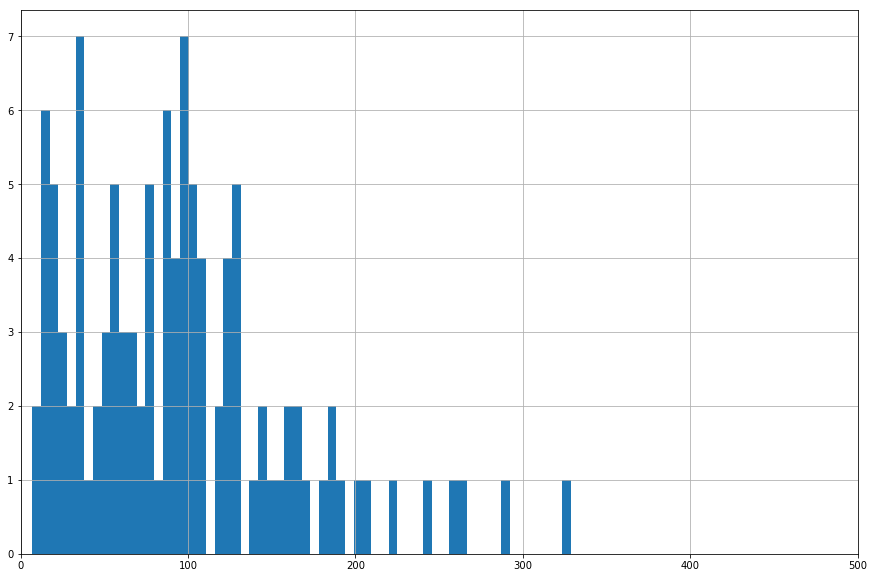

In [623]:
plt.figure(figsize=(15, 10))
plt.hist(diffs, bins=100)
plt.grid(True)
plt.xlim(0, 500)

In [624]:
np.unique(corpus_tokens_stem).shape[0] / float(corpus_tokens_stem.shape[0])

0.990990990990991

In [625]:
stat = {}

tmp_corp, tmp_texts = [], []

for i, tokens in enumerate(log_progress(corpus_tokens_stem)):
    s = ' '.join(tokens)
    if stat.get(s, None) is None:
        stat[s] = True
        tmp_corp.append(tokens)
        tmp_texts.append(texts[i])
        
corpus_tokens_stem = tmp_corp
texts = tmp_texts
print(len(corpus_tokens_stem), len(texts))

Widget Javascript not detected.  It may not be installed or enabled properly.


110 110


In [626]:
corpus_tokens_stem = np.asarray(corpus_tokens_stem)
texts = np.asarray(texts)

print(len(corpus_tokens_stem), len(texts))

110 110


In [627]:
diffs = np.asarray([len(tokens) for tokens in corpus_tokens_stem])
print(len(diffs))

110


(0, 500)

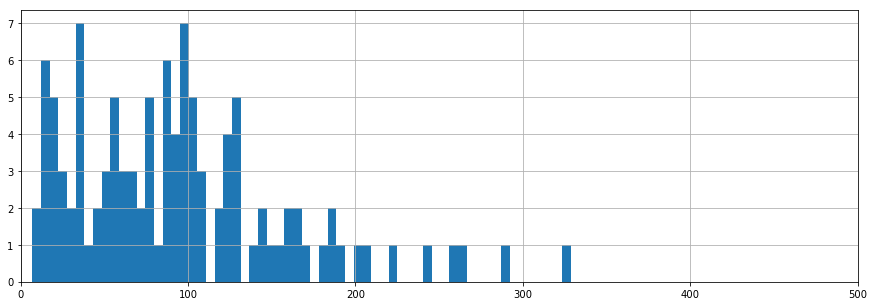

In [628]:
plt.figure(figsize=(15, 5))
plt.hist(diffs, bins=100)
plt.grid(True)
plt.xlim(0, 500)

In [629]:
corpus_tokens_stem

array([ ['террористическ', 'группировк', 'значительн', 'активизирова', 'деятельн', 'укреп', 'позиц', 'северн', 'район', 'афганиста', 'участ', 'вооружен', 'инцидент', 'границ', 'смирн', 'учет', 'понесен', 'потер', 'сир', 'ирак', 'вынужд', 'иска', 'пут', 'создан', 'нов', 'опорн', 'центр', 'халифат', 'усилен', 'север', 'афганиста', 'представля', 'ближайш', 'перспектив', 'основн', 'угроз', 'региональн', 'безопасн', 'отмет'],
       ['член', 'совместн', 'комисс', 'полн', 'решим', 'противодействова', 'нападк', 'сторон', 'сша', 'допуст', 'срыв', 'выполнен', 'согласова', 'ран', 'проект', 'явля', 'неотъемлем', 'част', 'договорен', 'задействова', 'имеющ', 'возможн', 'захаров', 'брифинг', 'выраз', 'надежд', 'созда', 'шаг', 'направлен', 'противодейств', 'санкц', 'сша', 'механизм', 'скор', 'заработа', 'использова', 'поддержк', 'ядерн', 'соглашен', 'ира', 'шестерк', 'международн', 'посредник', 'росс', 'сша', 'британ', 'кита', 'франц', 'герман', 'июл', 'достигл', 'историческ', 'соглашен', 'урегулиров

In [630]:
corpus_tokens_stem[diffs == 26]

array([ ['ран', 'сообща', 'задержан', 'четырех', 'подозрева', 'причастн', 'нападен', 'сред', 'гражданин', 'австрал', 'предъявл', 'обвинен', 'убийств', 'пятниц', 'минимум', 'мечет', 'произошл', 'стрельб', 'полиц', 'сообщ', 'погибш', 'нов', 'зеланд', 'назва', 'произошедш', 'теракт'],
       ['представительниц', 'певиц', 'наканун', 'сообщ', 'наход', 'столичн', 'клиник', 'лечен', 'состоян', 'оценива', 'тяжел', 'исаев', 'уточн', 'артистк', 'ввел', 'состоян', 'искусствен', 'ком', 'котор', 'необходим', 'организм', 'отдохнул', 'диагноз', 'постав', 'исаев', 'называ']], dtype=object)

In [631]:
corpus_tokens_stem[diffs >= 26].shape

(96,)

In [632]:
corp4learning = corpus_tokens_stem[diffs >= 11]
texts4learning = texts[diffs >= 11]

In [633]:
tmp_corp = []

for tokens in corp4learning:
    tmp_corp.append([t for t in tokens if len(t) > 2])
corp4learning = tmp_corp

In [634]:
vocab = np.unique(np.concatenate(corp4learning).flatten()).tolist()
print(len(vocab))

3765


# Лабораторная №3. Обратный индекс (поисковик)

In [635]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [636]:
textt = ' '
for j in range(len(corpus)):
    textt+=corpus[j]
textt

' none террористические группировки значительно активизировали диверсионнотеррористическую деятельность и укрепили свои позиции в северных районах афганистана участились вооружённые инциденты на границе сказал смирнов с учётом понесённых потерь в сирии и ираке игил вынуждена искать пути по созданию новых опорных центров халифата усиление игил на севере афганистана может представлять в ближайшей перспективе основную угрозу региональной безопасности отметил он nonenone члены совместной комиссии полны решимости противодействовать санкционным нападкам со стороны сша и не допустить срыва выполнения согласованных ранее проектов которые являются неотъемлемой частью договоренностей года задействовать все имеющиеся для этого возможности сказала захарова на брифинге она также выразила надежду что созданный как шаг в направлении противодействия санкциям сша механизм instex скоро заработает и будет использован для поддержки ядерного соглашения иран и шестерка международных посредников россия сша б

In [637]:
print (corpus[10])

none очередные президентские выборы пройдут на территории украины марта на пост главы государства претендуют кандидатов согласно социологическим исследованиям лидировала в гонке тимошенко однако последних два месяца лидерство в рейтинге удерживает зеленский опубликованный марта на сайте центра социс опрос свидетельствует что зеленского готовы поддержать избирателей которые точно пойдут голосовать и определились с выбором кандидата порошенко набрал тимошенко при этом она отметила что такой риск ни одна из команд конкурентов действующего главы государства сейчас не оценивает в полной мере все заняты своими делами эксперт выразила мнение что победу на президентских выборах можно прогнозировать зеленскому или тимошенко если команда порошенко не станет нарушать избирательное законодательство в день голосования математическую победу можно прогнозировать зеленскому если он не пропустит две технологических шайбы – мобилизацию электората – ред и защиту голосов если он их пропускает тогда матема

In [638]:
texts_filt=corpus

In [639]:
corpus[12]

'none порошенко в пятницу поедет в закарпатскою область там запланировано заседание совета регионального развития по данным сайта к приезду порошенко в области несколько дней активно готовились в частности латали ямы на дорогах убирали обочины вдоль трассы киевчоп и мыли мост в ужгороде в виноградове также решили присоединиться к марафону и украсить город к приезду гаранта конституции ред местные жители поставили яркие цветы в ямы на дорогах в общем в ямы поставили цветков говорится в сообщении'

In [640]:
texts_filt

['none террористические группировки значительно активизировали диверсионнотеррористическую деятельность и укрепили свои позиции в северных районах афганистана участились вооружённые инциденты на границе сказал смирнов с учётом понесённых потерь в сирии и ираке игил вынуждена искать пути по созданию новых опорных центров халифата усиление игил на севере афганистана может представлять в ближайшей перспективе основную угрозу региональной безопасности отметил он none',
 'none члены совместной комиссии полны решимости противодействовать санкционным нападкам со стороны сша и не допустить срыва выполнения согласованных ранее проектов которые являются неотъемлемой частью договоренностей года задействовать все имеющиеся для этого возможности сказала захарова на брифинге она также выразила надежду что созданный как шаг в направлении противодействия санкциям сша механизм instex скоро заработает и будет использован для поддержки ядерного соглашения иран и шестерка международных посредников россия 

In [641]:
ii = {}

for i_t, text in enumerate(log_progress(texts_filt)):
    for w in text.lower().split():
        if ii.get(w, None) is None:
            ii[w] = [i_t]
        else:
            ii[w].append(i_t)
            
for w in ii.keys():
    ii[w] = np.unique(ii[w])

Widget Javascript not detected.  It may not be installed or enabled properly.


In [642]:
ii

{'none': array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  50,  51,  52,  53,  54,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  92,  95,  96,  97,  98,
         99, 101, 102, 103, 106, 107, 108, 109, 110]),
 'террористические': array([0, 9]),
 'группировки': array([0, 9]),
 'значительно': array([0]),
 'активизировали': array([0]),
 'диверсионнотеррористическую': array([0]),
 'деятельность': array([ 0,  3, 22]),
 'и': array([  0,   1,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  40,  42,  43,

In [643]:
def search(query):
    #print(query)
    stub = range(10)
    res = [s for s in stub]
    for word in query.strip().split():
        res = np.intersect1d(res, ii.get(word, res))
    print(res)
    return [texts_filt[i] for i in res]

In [645]:
search('комиссии')

[1]


['none члены совместной комиссии полны решимости противодействовать санкционным нападкам со стороны сша и не допустить срыва выполнения согласованных ранее проектов которые являются неотъемлемой частью договоренностей года задействовать все имеющиеся для этого возможности сказала захарова на брифинге она также выразила надежду что созданный как шаг в направлении противодействия санкциям сша механизм instex скоро заработает и будет использован для поддержки ядерного соглашения иран и шестерка международных посредников россия сша британия китай франция германия июля года достигли исторического соглашения об урегулировании многолетней проблемы иранского атома был принят совместный всеобъемлющий план действий свпд выполнение которого снимало с ирана введенные ранее экономические и финансовые санкции со стороны сб оон сша и евросоюза сша в мае года объявили о выходе из соглашения о ядерной программе с ираном и восстановлении всех санкций против страны в том числе вторичных то есть в отношен

# Лаба №4. tf idf (поисковик)

In [646]:
import os
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.neighbors import NearestNeighbors
import nltk
from nltk.corpus import stopwords
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [647]:
initial_categories = ['world', 'economics', 'events', 'science', 'culture', 'politics']

In [648]:
data_train = corpus
stopWords = set(stopwords.words('russian'))

In [649]:
vectorizer = TfidfVectorizer(stop_words=stopWords)
tfidf_train = vectorizer.fit_transform(data_train)

print (tfidf_train.shape)

(111, 6828)


In [650]:
tfidf_train

<111x6828 sparse matrix of type '<class 'numpy.float64'>'
	with 11524 stored elements in Compressed Sparse Row format>

In [651]:
valid_inds = []

for i_el, el in enumerate(tfidf_train):
    if el.getnnz() > 0:
        valid_inds.append(i_el)
        
valid_inds = np.asarray(valid_inds)
print (len(valid_inds))
        
tfidf_train_filt = tfidf_train[valid_inds]
print (tfidf_train_filt.shape)

111
(111, 6828)


In [652]:
np.save('tf-idf_train', tfidf_train_filt)

In [653]:
predictor = NearestNeighbors(n_neighbors=1, algorithm='brute', metric='cosine').fit(tfidf_train_filt)

In [654]:
request = 'единая россия'

In [655]:
tfidf_test = vectorizer.transform([vectorizer.decode(request)])

print (tfidf_test.shape)

(1, 6828)


In [656]:
tfidf_test

<1x6828 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [657]:
vectorizer.vocabulary_

{'none': 49,
 'террористические': 6009,
 'группировки': 1159,
 'значительно': 1793,
 'активизировали': 139,
 'диверсионнотеррористическую': 1325,
 'деятельность': 1308,
 'укрепили': 6229,
 'свои': 5230,
 'позиции': 3997,
 'северных': 5270,
 'районах': 4877,
 'афганистана': 288,
 'участились': 6339,
 'вооружённые': 772,
 'инциденты': 1956,
 'границе': 1137,
 'сказал': 5366,
 'смирнов': 5442,
 'учётом': 6358,
 'понесённых': 4114,
 'потерь': 4240,
 'сирии': 5350,
 'ираке': 1960,
 'игил': 1813,
 'вынуждена': 911,
 'искать': 1969,
 'пути': 4774,
 'созданию': 5548,
 'новых': 3179,
 'опорных': 3426,
 'центров': 6543,
 'халифата': 6463,
 'усиление': 6284,
 'севере': 5265,
 'представлять': 4362,
 'ближайшей': 400,
 'перспективе': 3791,
 'основную': 3492,
 'угрозу': 6187,
 'региональной': 4980,
 'безопасности': 343,
 'отметил': 3582,
 'члены': 6621,
 'совместной': 5514,
 'комиссии': 2230,
 'полны': 4065,
 'решимости': 5045,
 'противодействовать': 4700,
 'санкционным': 5190,
 'нападкам': 2911,
 '

In [658]:
print (tfidf_test[0])

  (0, 5108)	1.0


In [659]:
vectorizer.get_feature_names()[148]

'актуальной'

In [660]:
distances, inds_pred = predictor.kneighbors(tfidf_test, n_neighbors=10)

In [661]:
distances = np.squeeze(distances)
inds_pred = np.squeeze(inds_pred)

(0, 1)

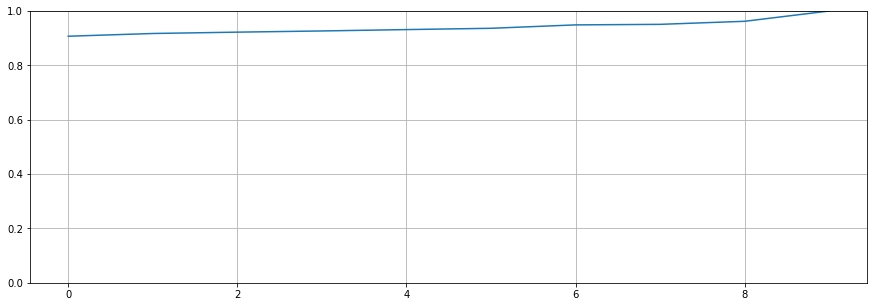

In [662]:
plt.figure(figsize=(15, 5))

plt.plot(distances)
plt.grid(True)
plt.ylim(0, 1)

In [663]:
for i, item in enumerate(np.asarray(corpus)[valid_inds[inds_pred]], start=1):
    print ('--------------------------- Top-{} ---------------------------'.format(i))
    print (item)
    print ('---------------------------- end -----------------------------')
    print

--------------------------- Top-1 ---------------------------
none в венесуэле января начались массовые протесты против действующего президента николаса мадуро вскоре после приведения его к присяге после начала беспорядков спикер оппозиционного парламента хуан гуаидо незаконно провозгласил себя временным главой государства ряд стран запада во главе с сша заявили о признании гуаидо в свою очередь мадуро назвал главу парламента марионеткой сша россия китай и ряд других стран поддержали мадуро как легитимного президента венесуэлы в москве назвали президентский статус гуаидо несуществующим
---------------------------- end -----------------------------
--------------------------- Top-2 ---------------------------
none при формировании программы проведут инвентаризацию всех экспериментов на предмет актуальности значимости и возможности реализации до года в июне года гендиректор роскосмоса дмитрий рогозин рассказал в интервью риа новости что россия откажется от проведения экспериментов на мкс

# Лабораторная №5. Классификатор.

In [664]:
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import itertools
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

%matplotlib inline

In [665]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

### Prepare The Data

In [666]:
print (vectorizer)
print (initial_categories)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'эти', 'или', 'без', 'меня', 'все', 'куда', 'два', 'совсем', 'зачем', 'ни', 'сейчас', 'теперь', 'наконец', 'впрочем', 'до', 'опять', 'было', 'бы', 'в', 'свою', 'ним', 'над', 'он', 'от', 'того', 'для', 'что', 'же', 'еще', 'нибудь', 'может', 'какой', 'эту', 'об', 'о', 'нельзя', 'чего', 'ни...оть', 'между', 'будто', 'так', 'и', 'мне', 'какая', 'уж', 'вдруг', 'не', 'был', 'этого', 'ей', 'их'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)
['world', 'economics', 'events', 'science', 'culture', 'politics']


In [667]:
data_train = []
y_train = []
data_test = []
y_test = []
   
y_train = np.asarray(y_train)
    
print (len(data_train), len(y_train))

0 0


In [668]:
import random
def splitTrainTest (data, index, testPercent):
    trainData  = []
    trainIndex = []
    testData   = []
    testIndex  = []
    for text,i in zip(data,index):
        if random.random()*100 < testPercent:
            testData.append(text)
            testIndex.append(i)
        else:
            trainData.append(text)
            trainIndex.append(i)
    return trainData, trainIndex, testData, testIndex

In [669]:
data_train, y_train, data_test, y_test = splitTrainTest(corpus, corpus_cat, 35)

y_test

In [670]:
print (len(data_train), len(y_train))

59 59


In [671]:
print (len(data_test), len(y_test))

52 52


In [672]:
X_train = vectorizer.fit_transform(data_train)
X_test = vectorizer.transform(data_test)

print (X_train.shape, X_test.shape)

(59, 3983) (52, 3983)


In [673]:
X_train

<59x3983 sparse matrix of type '<class 'numpy.float64'>'
	with 5848 stored elements in Compressed Sparse Row format>

## Build Models

* **Logistic Regression**
* **SVM**
* **Random Forest**
* **Gradient Boosting Trees**

**Define classifiers:**

In [674]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [675]:
predictor_lr = LogisticRegression().fit(X_train, y_train)

In [676]:
predictor_svm = LinearSVC().fit(X_train, y_train)

In [677]:
predictor_rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [678]:
predictor_gbt = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

**Evaluate Classifiers:**

In [679]:
y_pred_lr = predictor_lr.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr), 2)))

LR accuracy: 0.46%


In [680]:
y_pred_svm = predictor_svm.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_svm), 2)))

LR accuracy: 0.48%


In [681]:
y_pred_rf = predictor_rf.predict(X_test)
print ('RF accuracy: {}%'.format(round(np.mean(y_test == y_pred_rf), 2)))

RF accuracy: 0.37%


In [682]:
X_test=X_test.todense()
y_pred_gbt = predictor_gbt.predict(X_test)
print ('GBT accuracy: {}%'.format(round(np.mean(y_test == y_pred_gbt), 2)))

GBT accuracy: 0.37%


### [Confusion Matrices]

In [683]:
def plot_confusion_matrix(cm, title='Contingency matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    classes = [x.split('.')[-1] for x in initial_categories]
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

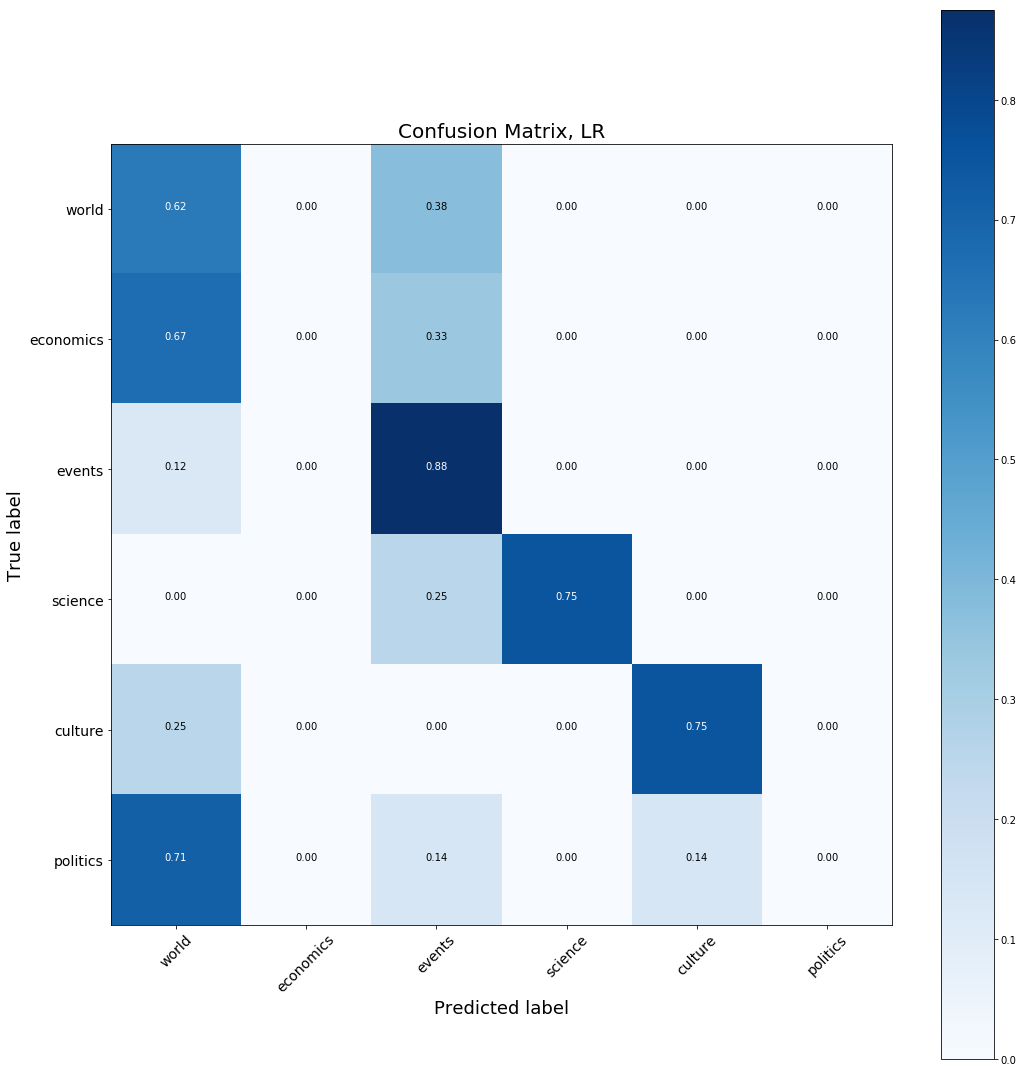

In [684]:
cmt_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cmt_lr, title='Confusion Matrix, LR')

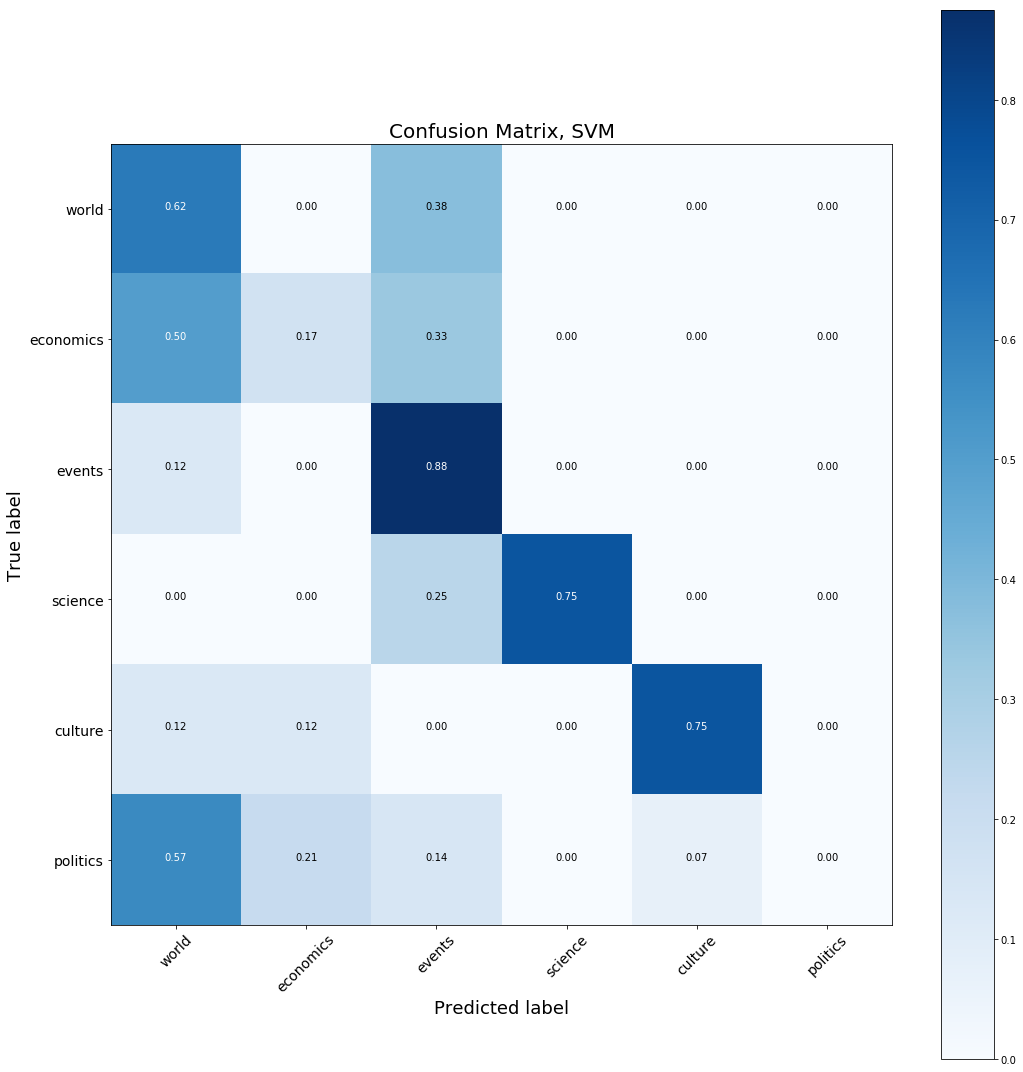

In [685]:
cmt_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cmt_svm, title='Confusion Matrix, SVM')

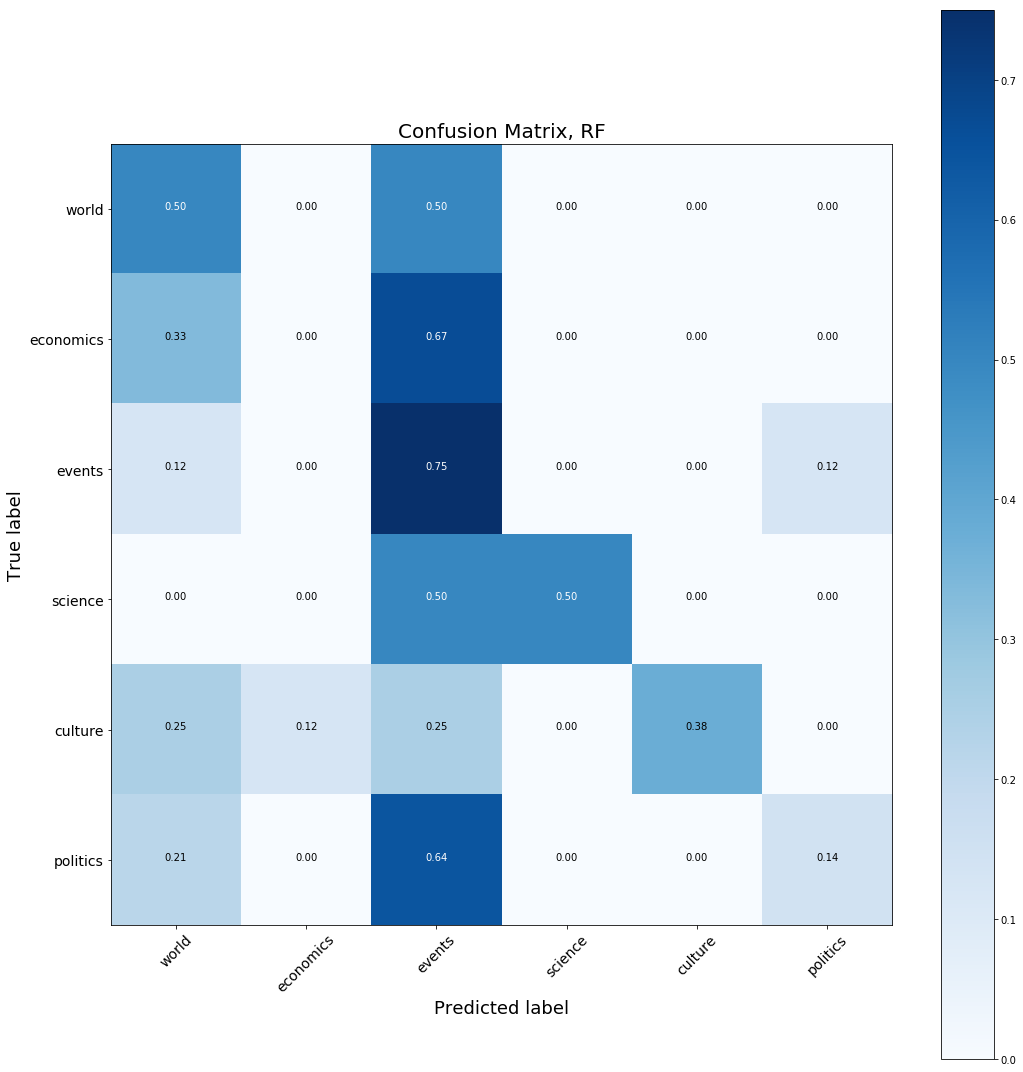

In [686]:
cmt_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cmt_rf, title='Confusion Matrix, RF')

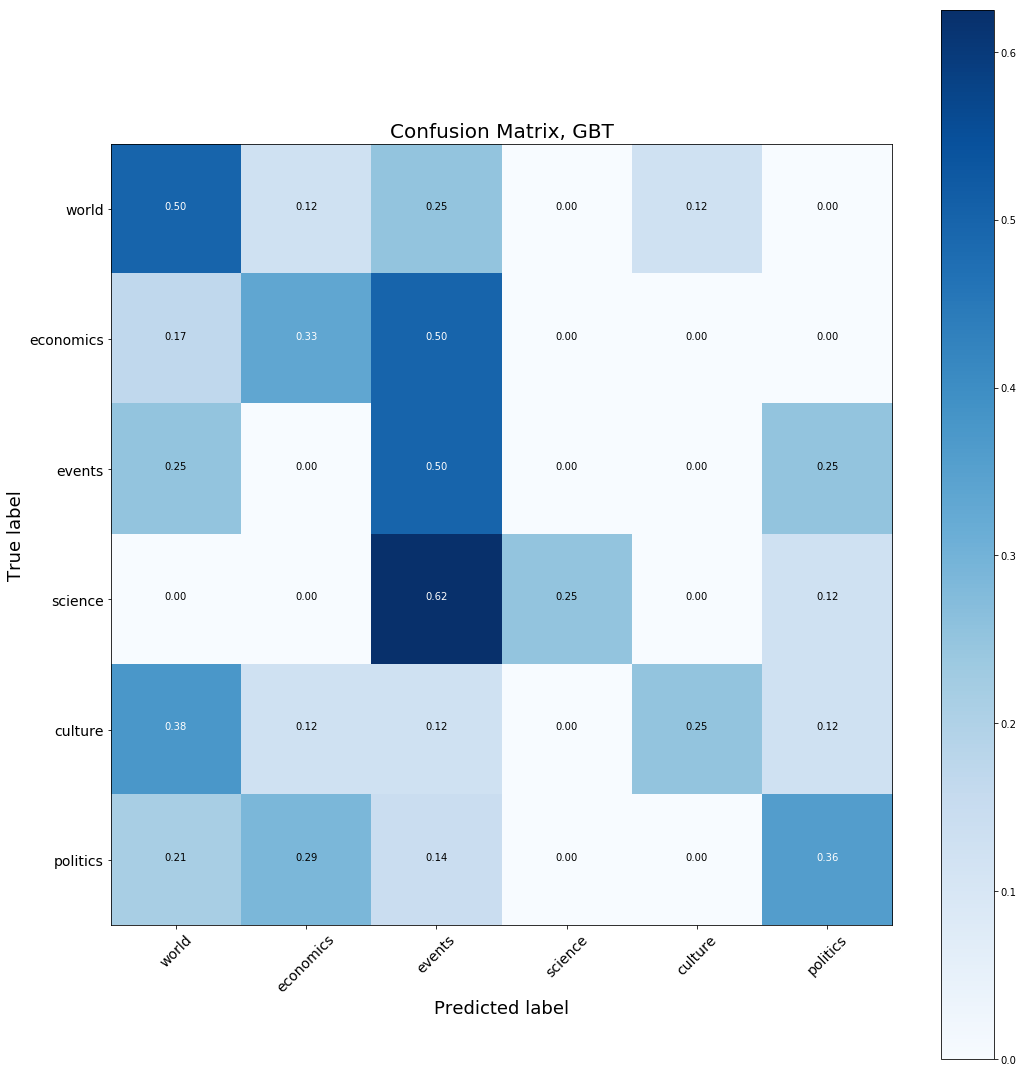

In [687]:
cmt_gbt = confusion_matrix(y_test, y_pred_gbt)
plot_confusion_matrix(cmt_gbt, title='Confusion Matrix, GBT')

### Feature Importances:

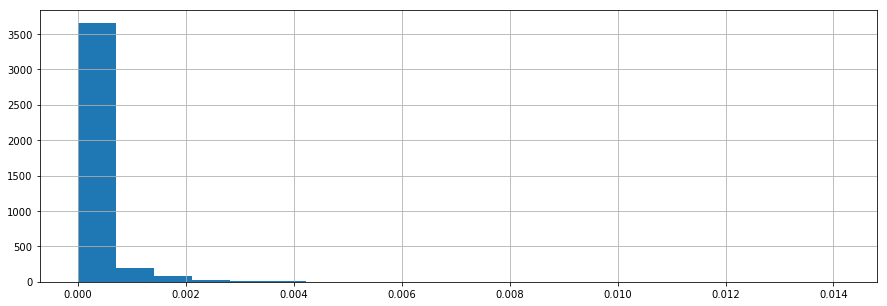

In [688]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=20)
plt.grid(True)

(0, 0.001)

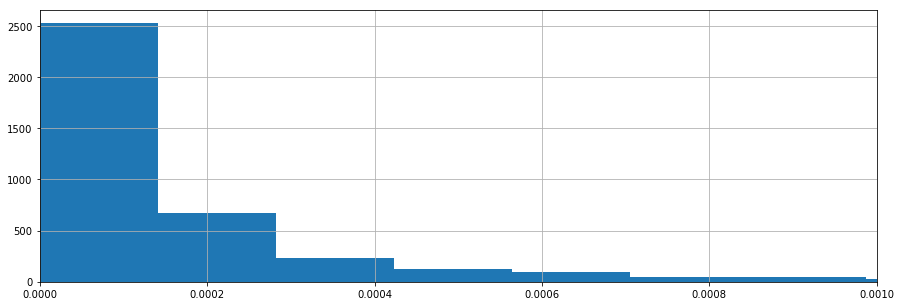

In [689]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=100)
plt.grid(True)
plt.xlim(0, 0.001)

**Create feature selector:**

In [690]:
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=10)).fit(X_train, y_train)

In [691]:
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(X_test)

print (X_train_transformed.shape, X_test_transformed.shape)

(59, 208) (52, 208)


**Train and evaluate the new classifier:**

In [692]:
predictor_lr_ = LogisticRegression().fit(X_train_transformed, y_train)

In [693]:
y_pred_lr_ = predictor_lr_.predict(X_test_transformed)
print ('LR (with feature selection) accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr_), 2)))

LR (with feature selection) accuracy: 0.33%


### Binary Classification

In [694]:
predictor_oneVSall = OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [695]:
y_pred_onevsall = predictor_oneVSall.predict(X_test)
print ('One-VS-all accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsall), 2)))

One-VS-all accuracy: 0.48%


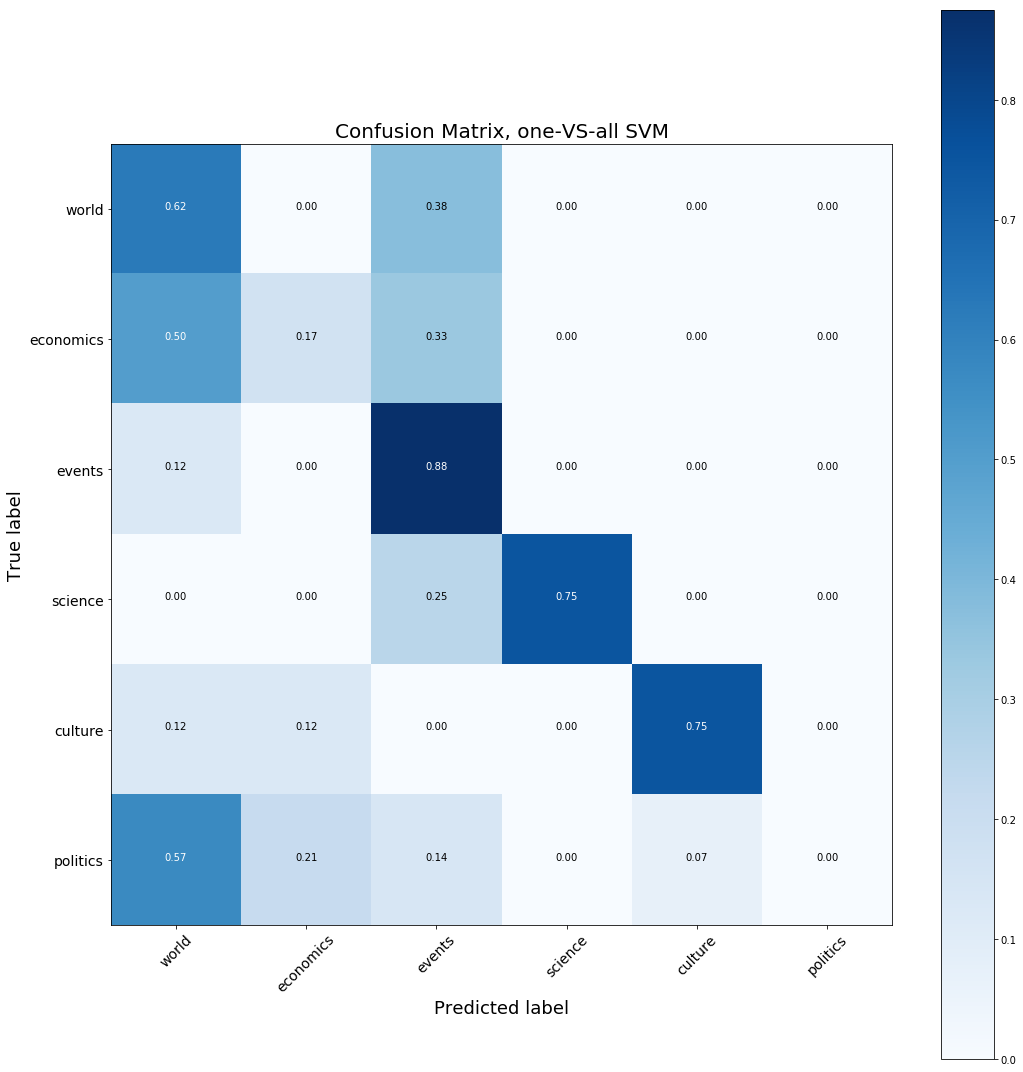

In [696]:
cmt_svm_onevsall = confusion_matrix(y_test, y_pred_onevsall)
plot_confusion_matrix(cmt_svm_onevsall, title='Confusion Matrix, one-VS-all SVM')

In [697]:
predictor_oneVSone = OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [698]:
y_pred_onevsone = predictor_oneVSone.predict(X_test)
print ('One-VS-one accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsone), 2)))

One-VS-one accuracy: 0.4%


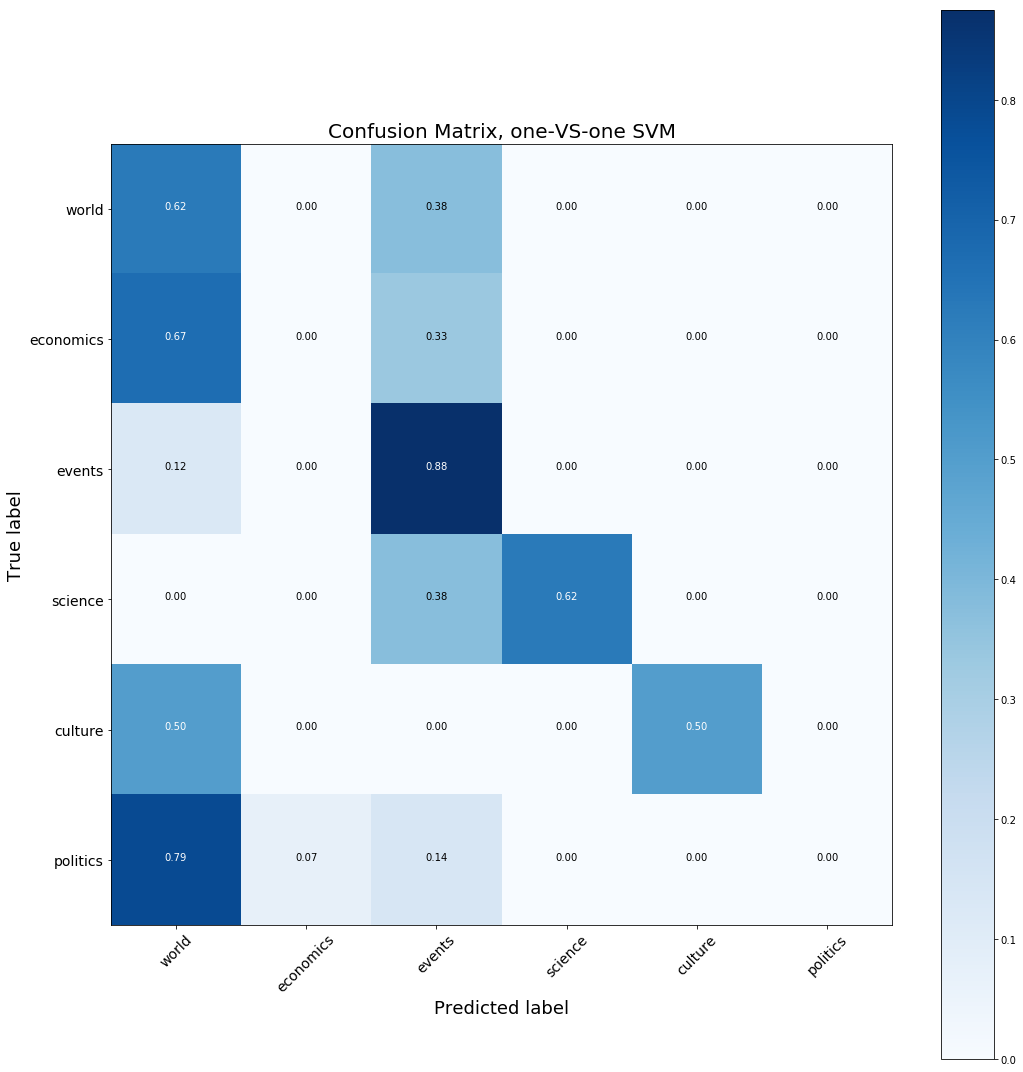

In [699]:
cmt_svm_onevsone = confusion_matrix(y_test, y_pred_onevsone)
plot_confusion_matrix(cmt_svm_onevsone, title='Confusion Matrix, one-VS-one SVM')

In [700]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
for c in np.unique(y_train):
    print ('Class \'{}\' samples N: {}'.format(c, y_train[y_train == c].shape[0]))

Class '0' samples N: 12
Class '1' samples N: 6
Class '2' samples N: 12
Class '3' samples N: 12
Class '4' samples N: 12
Class '5' samples N: 5


In [701]:
X_train_bin = X_train[(y_train == 2) | (y_train == 4)]
y_train_bin = y_train[(y_train == 2) | (y_train == 4)]

y_train_bin[y_train_bin == 2] = 0
y_train_bin[y_train_bin == 4] = 1

print (X_train_bin.shape, y_train_bin.shape)

(24, 3983) (24,)


In [702]:
X_test_bin = X_test[(y_test == 2) | (y_test == 4)]
y_test_bin = y_test[(y_test == 2) | (y_test == 4)]

y_test_bin[y_test_bin == 2] = 0
y_test_bin[y_test_bin == 4] = 1

print (X_test_bin.shape, y_test_bin.shape)

(16, 3983) (16,)


In [703]:
one_binary_predictor = RandomForestClassifier(n_estimators=100).fit(X_train_bin, y_train_bin)

### Metrics

In [704]:
y_pred_binary = one_binary_predictor.predict(X_test_bin)

print ('Binary classifiers accuracy: {}%'.format(round(np.mean(y_pred_binary == y_test_bin), 2)))

Binary classifiers accuracy: 0.56%


In [705]:
def FP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] != y_pred[y_true == 0]))

In [706]:
def TP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] == y_pred[y_true == 1]))

In [707]:
def FN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] != y_pred[y_true == 1]))

In [708]:
def TN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] == y_pred[y_true == 0]))

In [709]:
fp = FP(y_test_bin, y_pred_binary)
fn = FN(y_test_bin, y_pred_binary)
tp = TP(y_test_bin, y_pred_binary)
tn = TN(y_test_bin, y_pred_binary)

print ('TP = {}, FP = {}, TN = {}, FN = {}\n---------------------------------------------\nsum = {}'.format(tp, fp, tn, fn, tp + fp + tn + fn))

TP = 1.0, FP = 0.0, TN = 8.0, FN = 7.0
---------------------------------------------
sum = 16.0


In [710]:
P = precision_score(y_test_bin, y_pred_binary)
R = recall_score(y_test_bin, y_pred_binary)

print ('Precision: {}, Recall: {}'.format(P, R))

Precision: 1.0, Recall: 0.125


In [711]:
print (tp / (tp + fp), tp / (tp + fn))

1.0 0.125


In [712]:
print ('F1: {}'.format(f1_score(y_test_bin, y_pred_binary)))

F1: 0.2222222222222222


In [713]:
print (2.0 * P * R / (P + R))

0.222222222222


In [714]:
scores_binary = one_binary_predictor.predict_proba(X_test_bin)[:, 1]

print (scores_binary.shape)

(16,)


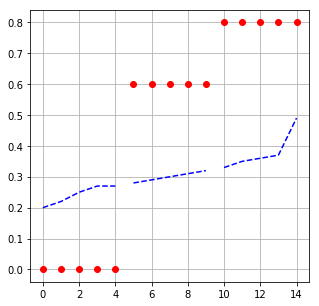

In [715]:
plt.figure(figsize=(5, 5))

N_batch = 3
inds = np.argsort(scores_binary)
scores_sorted = scores_binary[inds]
y_sorted = y_test_bin[inds]
q = len(y_test_bin) // N_batch

for i in range(N_batch):
    plt.plot(range(q * i, q * (i + 1)), scores_sorted[q * i : q * (i + 1)], '--b')
    plt.plot(range(q * i, q * (i + 1)), [np.mean(y_sorted[q * i : q * (i + 1)])] * q, 'ro')
    
plt.grid(True)

In [716]:
fpr, tpr, thresholds = roc_curve(y_test_bin, scores_binary)

(-0.1, 1.1)

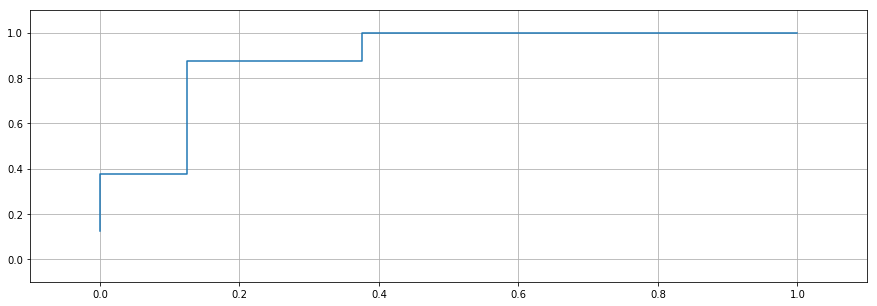

In [717]:
plt.figure(figsize=(15, 5))

inds = np.argsort(fpr)
plt.plot(fpr[inds], tpr[inds])
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [718]:
roc_auc = roc_auc_score(y_test_bin, scores_binary)

print ('AUC score: {}'.format(roc_auc, 2))

AUC score: 0.890625


In [719]:
f1_max = 0
y_pred_best = None

for thr in thresholds:
    y_pred_tuned = scores_binary.copy()
    y_pred_tuned[y_pred_tuned < thr] = 0
    y_pred_tuned[y_pred_tuned >= thr] = 1
    
    f1 = f1_score(y_test_bin, y_pred_tuned)
    if f1 > f1_max:
        f1_max = f1
        y_pred_best = y_pred_tuned
    if f1 > 0.894308943089:
        print ('thr = {}: F1 +{}'.format(thr, round(f1 - 0.8920570264765784, 4)))
        
print ()
print ('Max. F1: {}'.format(round(f1_max, 3)))


Max. F1: 0.875


In [720]:
print (np.mean(y_test_bin == y_pred_best))

0.875


## Ensembling

In [721]:
print (np.mean(RandomForestClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(GradientBoostingClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))

0.269230769231
0.307692307692
0.326923076923


In [722]:
ensemble_soft = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=1)

ensemble_hard = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=1)

In [723]:
ensemble_soft.fit(X_train, y_train)
ensemble_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_gini_10', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
      ...s=10, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))],
         n_jobs=1, voting='hard', weights=None)

In [724]:
y_pred_hard = ensemble_hard.predict(X_test)
y_pred_soft = ensemble_soft.predict(X_test)

print (y_pred_hard.shape, y_pred_soft.shape)

(52,) (52,)


In [725]:
print ('Hard voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_hard), 2)))
print ('Soft voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_soft), 2)))

Hard voting accuracy: 0.25%
Soft voting accuracy: 0.33%
